# **✨ Classification Models - Service Quality Strategy for Marketing Campaign by The Golden Gate ✨**

**👏 Members of Golden Gate 👏**

1. Daniel Andrew
2. Habib Septrian Priyanto
3. Josua Ricardo Samosir
4. Muhammad Rizdky Maulady

## **📍 Table of Content 📍**

- Data Cleansing/Preprocessing
    - Handling Duplicated Rows
    - Handling Invalid Values
    - Data Splitting
    - Handling Missing Values
    - Handling Outliers
    - Feature Engineering / Extraction
    - Feature Transformation (Numeric)
    - Feature Encoding (Categoric)
    - Feature Selection
    - Handling Imbalanced Data
    
- Modelling & Evaluation
    - Machine Learning Techniques
    - Function for Model Evaluation
    - Modelling
        - Decision Tree
        - Random Forest
        - Logistic Regression
        - Naive Bayes
        - K-Nearest Neighbors
        - MLP Classifier (Neural Network)
        - Adaboost Classifier
        - XGBoost Classifier
        - LGBM Classifier
        - Gradient Boosting Classifier
        - Support Vector Machine
    - Hyperparameter Tuning
    - Model Additional
    - Model Comparison
    - Model Selection
    - Business Insight and Recomendation
    - Simulation
- Final Presentation

- **Dataset**

[Open Data Airbnb Seattle](https://www.kaggle.com/datasets/airbnb/seattle)

# **====== STAGE 2 ======**
`Stage 2 (Data PreProcessing)`

## **📌 Import Libraries**

In [295]:
import gdown
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from folium import plugins
from folium.plugins import HeatMap
from scipy.stats import pointbiserialr

# Ignores any warning
import warnings
warnings.filterwarnings("ignore")

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

## **📌 Import  Raw Datasets**

In [296]:

# Import Dataset
dataset_link = 'https://drive.google.com/drive/folders/1wLAk6IsUNCWhGENAmAUnmXZxLiiv7m4q?usp=sharing'
gdown.download_folder(dataset_link, quiet=True, use_cookies=False)

# Path Dataset
path = '/content/Dataset/'

# Get the data from Dataset Folder
csv_files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]
df = {}

# Load each CSV file into a DataFrame
for file_name in csv_files:
    base_name = os.path.basename(file_name).replace('.csv', '')
    print(f"Load Path: {file_name} into DataFrame: {base_name}..")

    # Load the file and store it
    df[base_name] = pd.read_csv(file_name)

print("\nList Dataset")
print(df.keys())

Load Path: /content/Dataset/reviews.csv into DataFrame: reviews..
Load Path: /content/Dataset/calendar.csv into DataFrame: calendar..
Load Path: /content/Dataset/listings.csv into DataFrame: listings..

List Dataset
dict_keys(['reviews', 'calendar', 'listings'])


In [297]:
reviews = pd.read_csv('/content/Dataset/reviews.csv')
calendar = pd.read_csv('/content/Dataset/calendar.csv')
listings = pd.read_csv('/content/Dataset/listings.csv')

In [298]:
print("Jumlah baris dan kolom:", reviews.shape)
df['reviews'].head()

Jumlah baris dan kolom: (84849, 6)


listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [299]:
print("Jumlah baris dan kolom:", calendar.shape)
df['calendar'].head()

Jumlah baris dan kolom: (1393570, 4)


listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [300]:
print("Jumlah baris dan kolom:", listings.shape)
df['listings'].head()

Jumlah baris dan kolom: (3818, 92)


id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                                                

In [301]:
df['listings'].columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## **📌 Merge Datasets**

In [302]:
# Agregasi data reviews untuk menghitung jumlah ulasan per listing
reviews_agg = reviews.groupby('listing_id').agg({
    'id': 'count'  # Menghitung total ulasan per listing
}).rename(columns={'id': 'number_of_reviews'}).reset_index()
reviews_agg.head()

listing_id  number_of_reviews
0        4291                 35
1        5682                297
2        6606                 52
3        7369                 40
4        9419                 79

In [303]:
# Jika listings memiliki kolom 'id' dan bukan 'listing_id', ganti di penggabungan
merged1 = pd.merge(listings, reviews_agg, left_on='id', right_on='listing_id', how='left')

merged1.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                                                

In [304]:
# Ambil harga terbaru dari calendar
calendar['date'] = pd.to_datetime(calendar['date'])
latest_calendar = calendar.loc[calendar.groupby('listing_id')['date'].idxmax()]
latest_calendar.head()

listing_id       date available    price
797524         3335 2017-01-02         t  $120.00
1138434        4291 2017-01-02         t   $82.00
790954         5682 2017-01-02         f      NaN
137969         6606 2017-01-02         t   $90.00
1006669        7369 2017-01-02         f      NaN

In [305]:
# Mengkonversi type id 'listing_id' di latest_calendar seperti di merged_data
latest_calendar['listing_id'] = latest_calendar['listing_id'].astype(merged1['listing_id'].dtype)

# Merged data
df = pd.merge(merged1, latest_calendar[['listing_id', 'price', 'date']], on='listing_id', how='left')

df.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                                                

In [306]:
# Mengubah nama kolom
df = df.rename(columns={'price_x': 'price_listings'})
df = df.rename(columns={'price_y': 'price_calendar'})
df = df.rename(columns={'number_of_reviews_x': 'number_of_reviews'})

# Menghapus kolom double
df = df.drop(columns=['number_of_reviews_y'])

* Kolom price_x merupakan kolom price dari dataset listings yaitu harga sewa per malam (dalam dolar).
* Kolom price_y merupakan kolom price dari dataset calendar yaitu harga untuk tanggal tersebut (dalam dolar, bisa null untuk tanggal yang tidak tersedia).

In [307]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [308]:
#distribusi host_is_superhost
import plotly.express as px

host_superhost_counts = df['host_is_superhost'].value_counts()
host_superhost_percentage = (host_superhost_counts / host_superhost_counts.sum()) * 100

host_superhost_df = pd.DataFrame({
    'Host Superhost Status': host_superhost_counts.index,
    'Count': host_superhost_counts.values,
    'Percentage': host_superhost_percentage.values
})

fig = px.bar(
    host_superhost_df,
    x='Host Superhost Status',
    y='Count',
    color='Host Superhost Status', # Color the bars based on Superhost status
    text='Percentage',  # Display percentages on top of bars
    title='Distribution of Host Superhost Status',
    labels={'Count': 'Number of Hosts', 'Host Superhost Status': 'Host is Superhost', 'Percentage': 'Percentage of Hosts'}
)

fig.update_layout(title_x=0.5,  # Center the title
                  yaxis_title="Number of Hosts",
                  xaxis_title="Host is Superhost",
                  yaxis=dict(showgrid=True, gridcolor='lightgray'),
                  xaxis=dict(showgrid=False),
                  plot_bgcolor='white')

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

fig.show()

## **📌 Handling Invalid Values**

In [309]:
# Mengatur opsi untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
display(df)

id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                                    ...             ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                 name  \
0      2016-01-04         Stylish Queen Anne Apartment   
1      2016-01-04   Bright & Airy Queen Anne Apartment   
2      2016-01-04  New Modern House-Amazing water view   
3      2016-01-04                   Queen Anne Chateau   
4      2016-01-04       Charming craftsman 3 bdm house   
...           ...                                  ...   
3813   2016-01-04   3BR Mountain View House in Seattle   
3814   2016-01-04    Portage Bay View!-One Bedroom Apt   
3815   2016-01-04    Private apartment view of Lake WA   
3816   2016-01-04    Amazing View with Modern Comfort!   
3817   2016-01-04            Large Lakefront Apartment   

                                                summary  \
0                                                   NaN   
1     Chemically sensitive? We've removed the irrita...   
2     New modern house built in 2013.  Spectacular s...   
3     A charming apartment that sits atop Queen Anne...   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...   
3814  800 square foot 1 bedroom basement apartment w...   
3815  Very comfortable lower unit. Quiet, charming m...   
3816  Cozy studio condo in the heart on Madison Park...   
3817  All hardwood floors, fireplace, 65" TV with Xb...   

                                                  space  \
0     Make your self at home in this charming one-be...   
1     Beautiful, hypoallergenic apartment in an extr...   
2     Our house is modern, light and fresh with a wa...   
3                                                   NaN   
4     Cozy family craftman house in beautiful neighb...   
...                                                 ...   
3813  Our 3BR/2BA house bright, stylish, and wheelch...   
3814  This space has a great view of Portage Bay wit...   
3815                                                NaN   
3816  Fully furnished unit to accommodate most needs...   
3817                                                NaN   

                                            description experiences_offered  \
0     Make your self at home in this charming one-be...                none   
1     Chemically sensitive? We've removed the irrita...                none   
2     New modern house built in 2013.  Spectacular s...                none   
3     A charming apartment that sits atop Queen Anne...                none   
4     Cozy family craftman house in beautiful neighb...                none   
...                                                 ...                 ...   
3813  Our 3BR/2BA house boasts incredible views of t...                none   
3814  800 square foot 1 bedroom basement apartment w...                none   
3815  Very comfortable lower unit. Quiet, charming m...                none   
3816  Cozy studio condo in the heart on Madison Park...                none   
3817  All hardwood floors, fireplace, 65" TV with Xb...                none   

                                  neighborhood_overview  \
0           

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   object        
 4   name                              3818 non-null   object        
 5   summary                           3641 non-null   object        
 6   space                             3249 non-null   object        
 7   description                       3818 non-null   object        
 8   experiences_offered               3818 non-null   object        
 9   neighborhood_overview             2786 non-null   object        
 10  notes                             2212 non-null 

### **1. Melakukan Penyesuaian Tipe Data Fitur `object` ke `datetime`**

In [311]:
# Mengubah kolom tanggal menjadi datetime
date_columns = ['last_scraped', 'host_since', 'calendar_last_scraped',
                'first_review', 'last_review', 'date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

Fitur yang diubah dari object ke datetime yaitu: last_scraped, host_since, calendar_last_scraped, first_review, last_review, dan date.

Karena, konversi ini memungkinkan analisis yang lebih efektif terhadap data berbasis waktu. Dengan tipe data datetime, kita dapat melakukan operasi seperti perhitungan durasi, pengelompokan data berdasarkan waktu, dan analisis tren temporal.

### **2. Melakukan Penyesuaian tipe data fitur `object` ke `float`beserta pengapusan simbol**

In [312]:
# Mengubah kolom harga menjadi float
def convert_price(value):
    if pd.notnull(value):
        return float(value.replace('$', '').replace(',', ''))
    return value

columns_price = ['price_listings', 'weekly_price', 'monthly_price',
                 'security_deposit', 'cleaning_fee', 'extra_people', 'price_calendar']

for col in columns_price:
    df[col] = df[col].apply(convert_price)

Fitur yang diubah dari object ke float yaitu: price_listings, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people, dan price_calendar.

Karena konversi ini diperlukan untuk memastikan bahwa nilai-nilai yang berhubungan dengan harga dan biaya dapat digunakan dalam analisis numerik.

### **3. Melakukan Penyesuasian tipe data fitur `object` ke `bool`dari `t/f` menjadi `true / false`**

In [313]:
# Mengubah nilai 't'/'f' menjadi True/False dan mengubah tipe data menjadi boolean
boolean_columns = ['host_is_superhost', 'host_has_profile_pic',
                   'host_identity_verified', 'is_location_exact',
                   'has_availability', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']

for col in boolean_columns:
    df[col] = df[col].map({'t': True, 'f': False})
    df[col] = df[col].astype(bool)


Fitur yang diubah menjadi tipe data boolean yaitu: host_is_superhost, host_has_profile_pic, host_identity_verified, is_location_exact, has_availability, instant_bookable, require_guest_profile_picture, dan require_guest_phone_verification.

Karena konversi ini penting untuk memastikan bahwa kolom-kolom yang berisi informasi biner (ya/tidak) diwakili dengan tipe data yang sesuai.

### **4. Kolom `object` yang berisi angka perlu dikonversi ke `int` atau `float`**

In [314]:
# Mengubah kolom menjadi int atau float
int_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
               'minimum_nights', 'maximum_nights', 'availability_30',
               'availability_60', 'availability_90', 'availability_365',
               'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
               'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location',
               'review_scores_value', 'calculated_host_listings_count']

float_columns = ['bathrooms', 'bedrooms', 'beds',
                 'review_scores_rating', 'review_scores_accuracy',
                 'review_scores_cleanliness', 'review_scores_checkin',
                 'review_scores_communication', 'review_scores_location',
                 'review_scores_value', 'reviews_per_month']

for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')

for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')


konversi ini diperlukan untuk memastikan bahwa kolom-kolom yang berisi data numerik diwakili dengan tipe data yang sesuai, sehingga memungkinkan analisis matematis dan statistik yang lebih akurat.

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   datetime64[ns]
 4   name                              3818 non-null   object        
 5   summary                           3641 non-null   object        
 6   space                             3249 non-null   object        
 7   description                       3818 non-null   object        
 8   experiences_offered               3818 non-null   object        
 9   neighborhood_overview             2786 non-null   object        
 10  notes                             2212 non-null 

In [316]:
df.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   
2  Our house is located just 5 short blocks to To...   
3                                                NaN   
4                                          Belltown    

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   

                                      xl_picture_url   host_id  \
0                                                

In [317]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## **📌 Handle Duplicated Data**

In [318]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head()

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, name, summary, space, description, experiences_offered, neighborhood_overview, notes, transit, thumbnail_url, medium_url, picture_url, xl_picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, street, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, city, state, zipcode, market, smart_location, country_code, country, latitude, longitude, is_location_exact, property_type, room_type, accommodates, bathrooms, bedrooms, beds, bed_type, amenities, square_feet, price_listings, weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, requires_license, license, jurisdiction_names, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification, calculated_host_listings_count, reviews_per_month, listing_id, price_calendar, date]
Index: []

In [319]:
#handle duplicated
df.duplicated().sum()

0

In [320]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (3818, 95)
Data Frame Dimension After Duplicate Removal: (3818, 95)


In [321]:
# Memeriksa baris duplikat
duplicate_rows = df.duplicated()

# Menampilkan jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows.sum()}")

# Menampilkan baris duplikat
if duplicate_rows.sum() > 0:
    print("Baris duplikat:")
    print(df[duplicate_rows])
else:
    print("Tidak ada baris duplikat.")

Jumlah baris duplikat: 0
Tidak ada baris duplikat.


In [322]:
df.duplicated(subset=["id"]).sum()

0

### **Kesimpulan**

Tidak ditemui baris data yang memiliki duplikat, sehingga tidak perlu melakukan handling duplicated data. Selain itu, pada pengecekan duplikat subset untuk ID tidak ditemukan ada nya ID yang sama.

## **📌 Handle Missing Values**

---



In [323]:
null_values = df.isnull().sum()
print(null_values)

id                                   0
listing_url                          0
scrape_id                            0
last_scraped                         0
name                                 0
                                  ... 
calculated_host_listings_count       0
reviews_per_month                  627
listing_id                         627
price_calendar                    1533
date                               627
Length: 95, dtype: int64


In [324]:
# Menghitung total nilai null dan persentase
nvc = pd.DataFrame(null_values.sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values'] / df.shape[0]) * 100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)

# Menampilkan hasil
nvc.style.background_gradient(cmap='Blues')

In [325]:
for x in df.columns:
    unq = list(df[x].unique())
    try:
        # sorted_unq = sorted(unq) #jangan gunakan sorted
        sorted_unq = unq
    except TypeError:
        sorted_unq = unq
    print(f'===== {x} =====')
    if len(sorted_unq) >= 50:
        print(sorted_unq[:50] + ['.....'])
    else:
        print(sorted_unq)
    print()

===== id =====
[241032, 953595, 3308979, 7421966, 278830, 5956968, 1909058, 856550, 4948745, 2493658, 175576, 4454295, 3883392, 8889257, 5680462, 8988178, 3245876, 4933447, 7735464, 6291829, 9218403, 4125779, 8942678, 10106055, 6362362, 3544550, 9025039, 3200646, 8859380, 4520099, 2481869, 1110749, 5978498, 5021081, 1686930, 7680289, 7207641, 5062445, 8925878, 6389657, 4218733, 2715623, 1392332, 7308567, 6575380, 6004058, 9550869, 8515408, 5383192, 1112092, '.....']

===== listing_url =====
['https://www.airbnb.com/rooms/241032', 'https://www.airbnb.com/rooms/953595', 'https://www.airbnb.com/rooms/3308979', 'https://www.airbnb.com/rooms/7421966', 'https://www.airbnb.com/rooms/278830', 'https://www.airbnb.com/rooms/5956968', 'https://www.airbnb.com/rooms/1909058', 'https://www.airbnb.com/rooms/856550', 'https://www.airbnb.com/rooms/4948745', 'https://www.airbnb.com/rooms/2493658', 'https://www.airbnb.com/rooms/175576', 'https://www.airbnb.com/rooms/4454295', 'https://www.airbnb.com/room

### **Drop Column**

In [326]:
# Menghapus kolom license dan square feet
df = df.drop(columns=['license', 'square_feet'])

# Menghapus kolom neighbourhood
df = df.drop(columns=['neighbourhood'])

* Kolom license dan square feet terlalu banyak baris yang kosong, membuat kolom tersebut tidak bisa digunakan
* Kolom neighbourhood tidak diperlukan karena sudah mempunyai versi cleansed nya

### **Drop Row**

In [327]:
# Menghapus nilai null pada id
df = df.dropna(subset=['listing_id'])

Kolom id tidak boleh memiliki nilai kosong

### **Imputation Numeric**

In [328]:
# Mencari Skewness pada fitur yang terdapat pada price_columns
price_columns = ['price_calendar', 'price_listings', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']

skewness_results = []
for col in price_columns:
    skewness = df[col].skew()
    if skewness > 0.5:
        skew_description = "Right Skewed"
    elif skewness < -0.5:
        skew_description = "Left Skewed"
    else:
        skew_description = "Approximately Symmetrical"
    skewness_results.append([col, skewness, skew_description])

skewness_df = pd.DataFrame(skewness_results, columns=['Column', 'Skewness', 'Skewness Description'])
skewness_df

Column  Skewness Skewness Description
0    price_calendar  3.294078         Right Skewed
1    price_listings  3.351625         Right Skewed
2      weekly_price  3.100936         Right Skewed
3     monthly_price  3.219567         Right Skewed
4  security_deposit  6.645763         Right Skewed
5      cleaning_fee  1.836434         Right Skewed

In [329]:
# Mengisi nilai kosong dengan nilai sebelumnya
rate_columns = ['host_response_rate', 'host_acceptance_rate', 'last_review', 'first_review']
for col in rate_columns:
    df[col] = df[col].ffill()

# Mengisi nilai kosong untuk kolom harga
price_columns = ['price_calendar', 'price_listings', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']
for col in price_columns:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)
    df[col] = df[col].fillna(df[col].median())

# Mengisi nilai kosong dengan rata-rata
score_columns = ['host_total_listings_count', 'host_listings_count','reviews_per_month', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
for col in score_columns:
    df[col] = df[col].fillna(df[col].mean())

Mengisi nilai null pada kolom numerik:
* fitur yang terdapat pada `rate_columns` nilai null Diisi dengan nilai sebelumnya
* fitur yang terdapat pada `price_columns` nilai null Diisi dengan nilai `median` karena memiliki right skewed dan nilai outlier ekstrem.
* fitur yang terdapat pada `score_columns` Diisi dengan rata rata karena tidak memiliki nilai outlier ekstrem

### **Imputation Categoric**

In [330]:
# Mengisi nilai kosong dengan kata terbanyak
frequent_text = ['host_response_time', 'summary', 'space', 'notes', 'neighborhood_overview', 'host_neighbourhood', 'bathrooms', 'bedrooms', 'beds', 'property_type', 'host_is_superhost', 'host_since', 'host_verifications']
for col in frequent_text:
    most_frequent_text = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent_text)

# Mengisi nilai kosong dengan tidak tersedia
not_available = df[['host_name', 'host_identity_verified', 'zipcode', 'host_location', 'host_about', 'transit']] = df[['host_name', 'host_identity_verified', 'zipcode', 'host_location', 'host_about', 'transit']].fillna('not available')

# Mengisi nilai kosong gambar dengan no image
no_image = df[['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_picture_url', 'host_has_profile_pic', 'host_thumbnail_url']] = df[['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_picture_url', 'host_has_profile_pic', 'host_thumbnail_url']].fillna("No Image")

Mengisi nilai null pada kolom kategorik:
* fitur yang terdapat pada `frequent_text` Diisi dengan kata yang paling banyak muncul atau modus
* fitur yang terdapat pada `not_available` Diisi dengan kata tidak tersedia
* fitur yang terdapat pada `no_image` Diisi dengan kata no image untuk kolom yang memiliki gambar

In [331]:
# Menghitung jumlah nilai null di setiap kolom setelah preprocessing
null_values_after = df.isnull().sum()

# Membuat DataFrame untuk menampilkan hasil
nvc = pd.DataFrame(null_values_after.sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values'] / df.shape[0]) * 100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)

# Menampilkan hasil
nvc.style.background_gradient(cmap='Blues')

### **Kesimpulan**
Proses penanganan nilai hilang dalam dataset ini melibatkan beberapa langkah yang sistematis:

1. Penghapusan Fitur: Fitur-fitur seperti 'license', 'square_feet', dan 'neighbourhood' dihapus karena tingginya jumlah nilai hilang atau karena redundansi, di mana fitur 'neighbourhood' telah digantikan oleh fitur lain.
2. Penghapusan Baris: Baris yang memiliki nilai hilang pada fitur 'listing_id' dihapus, mengingat pentingnya pengidentifikasi ini dalam analisis.

3. Imputasi (Numerik):

* Fitur yang merepresentasikan tingkat (host_response_rate, host_acceptance_rate, last_review, first_review) diimputasi menggunakan metode forward fill untuk menjaga konsistensi temporal.
* Fitur terkait harga dibersihkan dengan menghapus simbol mata uang dan diimputasi menggunakan nilai median, mengingat adanya skewness ke kanan dan outlier ekstrem.
* Fitur numerik lainnya (misalnya, skor dan jumlah) diimputasi menggunakan nilai rata-rata, karena tidak menunjukkan adanya outlier ekstrem.
4. Imputasi (Kategorikal):
* Fitur yang berisi data teks diimputasi dengan kategori yang paling sering muncul (modus).
* Fitur tertentu seperti 'host_name' dan 'host_identity_verified' diisi dengan nilai 'not available'.
* Fitur yang berkaitan dengan gambar diisi dengan "No Image.

Setelah melakukan langkah-langkah tersebut, tidak ada nilai hilang yang tersisa dalam dataset. Pemilihan metode imputasi (mean, median, modus, forward fill, atau konstanta) didasarkan pada tipe data dan distribusi fitur yang bersangkutan.

## **📌 Handling Outliers**

### **Checking Outlier**

In [332]:
import plotly.graph_objects as go

#Visualisasi Outlier untuk semua fitur dengan membedakan total superhost dengan not superhost
def plot_outliers(df, col):
  fig = go.Figure()

  # Plot all data
  fig.add_trace(go.Box(y=df[col], name='All Data', marker_color='lightblue'))

  # Plot superhost data
  superhost_df = df[df['host_is_superhost'] == True]
  fig.add_trace(go.Box(y=superhost_df[col], name='Superhost', marker_color='green'))

  # Plot non-superhost data
  not_superhost_df = df[df['host_is_superhost'] == False]
  fig.add_trace(go.Box(y=not_superhost_df[col], name='Not Superhost', marker_color='red'))


  fig.update_layout(
      title=f'Outlier Detection for {col}',
      title_x=0.5,
      yaxis_title=col,
      xaxis_title="Host Type",
      plot_bgcolor='white',
  )
  fig.show()

#
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
  plot_outliers(df, col)

In [333]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()  # Or define your num_cols manually

print(f'Jumlah baris: {len(df)}')
outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []
filtered_entries = np.array([True] * len(df))

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)
    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

outlier_summary = pd.DataFrame({
    "Column Name": num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier": outlier,
    "No Outlier": no_outlier
})

outlier_summary

Jumlah baris: 3191
Outlier All Data : 2760
Not Outlier All Data : 431



Column Name  is Outlier   Lower Limit   Upper Limit  \
0                               id       False -4.418180e+06  1.459816e+07   
1                        scrape_id       False  2.016010e+13  2.016010e+13   
2                          host_id       False -2.756480e+07  5.413978e+07   
3              host_listings_count        True -2.000000e+00  6.000000e+00   
4        host_total_listings_count        True -2.000000e+00  6.000000e+00   
5                         latitude        True  4.752846e+01  4.774261e+01   
6                        longitude       False -1.224186e+02 -1.222460e+02   
7                     accommodates        True -1.000000e+00  7.000000e+00   
8                        bathrooms        True  1.000000e+00  1.000000e+00   
9                         bedrooms        True -5.000000e-01  3.500000e+00   
10                            beds        True -5.000000e-01  3.500000e+00   
11                  price_listings        True -3.750000e+01  2.625000e+02   
12                    weekly_price        True  4.500000e+02  8.500000e+02   
13                   monthly_price        True  2.250000e+03  2.250000e+03   
14                security_deposit        True  2.000000e+02  2.000000e+02   
15                    cleaning_fee        True -1.750000e+01  1.225000e+02   
16                 guests_included        True -5.000000e-01  3.500000e+00   
17                    extra_people        True -3.000000e+01  5.000000e+01   
18                  minimum_nights        True -5.000000e-01  3.500000e+00   
19                  maximum_nights        True -1.610000e+03  2.766000e+03   
20                 availability_30       False -3.600000e+01  6.800000e+01   
21                 availability_60       False -4.350000e+01  1.205000e+02   
22                 availability_90       False -4.950000e+01  1.705000e+02   
23                availability_365       False -1.857500e+02  6.842500e+02   
24               number_of_reviews        True -3.650000e+01  7.150000e+01   
25            review_scores_rating        True  8.400000e+01  1.080000e+02   
26          review_scores_accuracy        True  7.500000e+00  1.150000e+01   
27       review_scores_cleanliness        True  7.500000e+00  1.150000e+01   
28           review_scores_checkin        True  1.000000e+01  1.000000e+01   
29     review_scores_communication        True  1.000000e+01  1.000000e+01   
30          review_scores_location        True  7.500000e+00  1.150000e+01   
31             review_scores_value        True  7.500000e+00  1.150000e+01   
32  calculated_host_listings_count        True -5.000000e-01  3.500000e+00   
33               reviews_per_month        True -2.762500e+00  6.457500e+00   
34                      listing_id       False -4.418180e+06  1.459816e+07   
35                  price_calendar        True  1.750000e+01  1.975000e+02   

    Outlier  No Outlier  
0         0        3191  
1         0        3191  
2         0        3191  
3       396        2795  
4       396        2795  
5        56        3135  
6         0        3191  
7       158        3033  
8       750        2441  
9        77        3114  
10      227        2964  
11      191        3000  
12      937        2254  
13     1350        1841  
14     1371        1820  
15      223        2968  
16      332        2859  
17       48        3143  
18      226        2965  
19        1        3190  
20        0        3191  
21        0        3191  
22        0        3191  
23        0        3191  
24      290        2901  
25      207        2984  
26       40        3151  
27       80        3111  
28      547        2644  
29      491        2700  
30       28        3163  
31       60        3131  
32      440        2751  
33       98        3093  
34        0        3191  
35      375        2816

In [334]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create an empty dictionary to store distribution descriptions
distribution_descriptions = {}

# Iterate through numerical columns
for col in numerical_cols:
    # Calculate skewness
    skewness = df[col].skew()

    # Categorize distribution based on skewness
    if abs(skewness) < 0.5:
        distribution = "Approximately Normal"
    elif skewness > 0.5:
        distribution = "Right Skewed"
    else:
        distribution = "Left Skewed"

    # Store the description
    distribution_descriptions[col] = distribution

# Create a DataFrame from the distribution descriptions
distribution_df = pd.DataFrame(list(distribution_descriptions.items()), columns=['Feature', 'Distribution'])

# Display the DataFrame
distribution_df

Feature          Distribution
0                               id  Approximately Normal
1                        scrape_id  Approximately Normal
2                          host_id          Right Skewed
3              host_listings_count          Right Skewed
4        host_total_listings_count          Right Skewed
5                         latitude  Approximately Normal
6                        longitude  Approximately Normal
7                     accommodates          Right Skewed
8                        bathrooms          Right Skewed
9                         bedrooms          Right Skewed
10                            beds          Right Skewed
11                  price_listings          Right Skewed
12                    weekly_price          Right Skewed
13                   monthly_price          Right Skewed
14                security_deposit          Right Skewed
15                    cleaning_fee          Right Skewed
16                 guests_included          Right Skewed
17                    extra_people          Right Skewed
18                  minimum_nights          Right Skewed
19                  maximum_nights          Right Skewed
20                 availability_30  Approximately Normal
21                 availability_60           Left Skewed
22                 availability_90           Left Skewed
23                availability_365           Left Skewed
24               number_of_reviews          Right Skewed
25            review_scores_rating           Left Skewed
26          review_scores_accuracy           Left Skewed
27       review_scores_cleanliness           Left Skewed
28           review_scores_checkin           Left Skewed
29     review_scores_communication           Left Skewed
30          review_scores_location           Left Skewed
31             review_scores_value           Left Skewed
32  calculated_host_listings_count          Right Skewed
33               reviews_per_month          Right Skewed
34                      listing_id  Approximately Normal
35                  price_calendar          Right Skewed

### **Cara Handle Outlier**

### **IQR (Interquartile Range)**

In [335]:
# Define a function to handle outliers using IQR
# def handle_outliers_iqr(df, col):
    # # Calculate Q1, Q3, and IQR
    # Q1 = df[col].quantile(0.25)
    # Q3 = df[col].quantile(0.75)
    # IQR = Q3 - Q1

    ## Calculate lower and upper limits
    # lower_limit = Q1 - 1.5 * IQR
    # upper_limit = Q3 + 1.5 * IQR

    ## Replace outliers with the limits
    # df[col] = np.where(df[col] < lower_limit, lower_limit, df[col]) # Replace outliers below lower limit
    # df[col] = np.where(df[col] > upper_limit, upper_limit, df[col]) # Replace outliers above upper limit

    # return df

## Apply IQR outlier handling to specified numerical columns
# num_cols = df.select_dtypes(include=np.number).columns.tolist() # Get numerical column names

# for col in num_cols:
    # df = handle_outliers_iqr(df, col) # Apply IQR handling to each numerical column

## Recalculate outlier statistics after handling
# outlier = []
# no_outlier = []
# is_outlier = []
# low_lim = []
# high_lim = []
# filtered_entries = np.array([True] * len(df)) # Initialize a boolean array for filtering

# for col in num_cols:
    # Q1 = df[col].quantile(0.25) # Calculate Q1
    # Q3 = df[col].quantile(0.75) # Calculate Q3
    # IQR = Q3 - Q1 # Calculate IQR
    # low_limit = Q1 - (IQR * 1.5) # Calculate lower limit
    # high_limit = Q3 + (IQR * 1.5) # Calculate upper limit
    # filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit)) # Create a boolean filter for outliers
    # outlier.append(len(df[~filter_outlier])) # Count outliers
    # no_outlier.append(len(df[filter_outlier]))  # Count non-outliers
    # is_outlier.append(df[col][~filter_outlier].any()) # Check if any outliers exist
    # low_lim.append(low_limit)  # Store lower limit
    # high_lim.append(high_limit)  # Store upper limit
    # filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries # Update filter for all columns

# print("Outlier All Data :", len(df[~filtered_entries])) # Total outliers across all columns
# print("Not Outlier All Data :", len(df[filtered_entries])) # Total non-outliers across all columns
# print()

# outlier_summary = pd.DataFrame({
    # "Column Name": num_cols,
    # "is Outlier": is_outlier,
    # "Lower Limit": low_lim,
    # "Upper Limit": high_lim,
    # "Outlier": outlier,
    # "No Outlier": no_outlier
# })

# Display the outlier summary
# outlier_summary

* Tidak ada outlier pada dataset ini untuk semua kolom. Semua data dianggap berada dalam batas yang wajar sesuai dengan perhitungan IQR

* Meskipun nilai outlier teratasi semua, Perhitungan IQR tidak cocok untuk mendeteksi outlier dalam dataset dengan distribusi tertentu, terutama jika distribusi tidak normal atau data cenderung homogen.

Maka pada dataset yang kita miliki tidak terlalu cocok karna banyak memiliki nilai ekstrem.

### **Z-Score**
Z-Score digunakan untuk kolom yang mendekati distribusi normal.

In [336]:
# Z-Score outlier handling
# from scipy import stats

# def handle_outliers_zscore(df, col, threshold=3):
    # z = np.abs(stats.zscore(df[col]))
    # df[col] = np.where(z > threshold, np.nan, df[col])
    # return df

# num_cols = df.select_dtypes(include=np.number).columns.tolist()
# for col in num_cols:
    # df = handle_outliers_zscore(df, col)

# Impute missing values after Z-score outlier removal (replace NaN with median)
# for col in num_cols:
    # df[col] = df[col].fillna(df[col].median())

# Recalculate outlier statistics after Z-score handling
# outlier = []
# no_outlier = []
# is_outlier = []
# low_lim = []
# high_lim = []
# filtered_entries = np.array([True] * len(df))

# for col in num_cols:
    # Q1 = df[col].quantile(0.25)
    # Q3 = df[col].quantile(0.75)
    # IQR = Q3 - Q1
    # low_limit = Q1 - (IQR * 1.5)
    # high_limit = Q3 + (IQR * 1.5)
    # filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    # outlier.append(len(df[~filter_outlier]))
    # no_outlier.append(len(df[filter_outlier]))
    # is_outlier.append(df[col][~filter_outlier].any())
    # low_lim.append(low_limit)
    # high_lim.append(high_limit)
    # filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

# print("Outlier All Data :", len(df[~filtered_entries]))
# print("Not Outlier All Data :", len(df[filtered_entries]))
# print()

# outlier_summary = pd.DataFrame({
    # "Column Name": num_cols,
    # "is Outlier": is_outlier,
    # "Lower Limit": low_lim,
    # "Upper Limit": high_lim,
    # "Outlier": outlier,
    # "No Outlier": no_outlier
# })

# outlier_summary

* Sebelum handling dengan Z-Score, jumlah total baris adalah 3191.
* Setelah Z-Score, terdapat 2841 outliers dan hanya 350 non-outliers yang tersisa.

* Z-Score terlalu ketat untuk dataset dengan distribusi skewed, sehingga menganggap banyak data valid sebagai outlier.


Hasil Z-Score kurang optimal untuk dataset ini karena terlalu banyak data yang dianggap outlier (89%)


### **Winsorization**

Winsorization mengganti nilai outlier dengan nilai batas tertentu, misalnya persentil 1% (batas bawah) dan 99% (batas atas). Ini cocok untuk data yang benar-benar memiliki outlier ekstrem.

In [337]:
from scipy.stats.mstats import winsorize

# Select numerical columns for winsorization
num_cols = df.select_dtypes(include=np.number).columns

# Apply winsorization to specified numerical columns
for col in num_cols:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])  # Winsorize at 1st and 99th percentiles

# Recalculate outlier statistics after winsorization
outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []
filtered_entries = np.array([True] * len(df))

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)
    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

outlier_summary = pd.DataFrame({
    "Column Name": num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier": outlier,
    "No Outlier": no_outlier
})

# Display the outlier summary after winsorization
outlier_summary

Outlier All Data : 2755
Not Outlier All Data : 436



Column Name  is Outlier   Lower Limit   Upper Limit  \
0                               id       False -4.418180e+06  1.459816e+07   
1                        scrape_id       False  2.016010e+13  2.016010e+13   
2                          host_id       False -2.756480e+07  5.413978e+07   
3              host_listings_count        True -2.000000e+00  6.000000e+00   
4        host_total_listings_count        True -2.000000e+00  6.000000e+00   
5                         latitude        True  4.752846e+01  4.774261e+01   
6                        longitude       False -1.224186e+02 -1.222460e+02   
7                     accommodates        True -1.000000e+00  7.000000e+00   
8                        bathrooms        True  1.000000e+00  1.000000e+00   
9                         bedrooms        True -5.000000e-01  3.500000e+00   
10                            beds        True -5.000000e-01  3.500000e+00   
11                  price_listings        True -3.750000e+01  2.625000e+02   
12                    weekly_price        True  4.500000e+02  8.500000e+02   
13                   monthly_price        True  2.250000e+03  2.250000e+03   
14                security_deposit        True  2.000000e+02  2.000000e+02   
15                    cleaning_fee        True -1.750000e+01  1.225000e+02   
16                 guests_included        True -5.000000e-01  3.500000e+00   
17                    extra_people        True -3.000000e+01  5.000000e+01   
18                  minimum_nights        True -5.000000e-01  3.500000e+00   
19                  maximum_nights       False -1.610000e+03  2.766000e+03   
20                 availability_30       False -3.600000e+01  6.800000e+01   
21                 availability_60       False -4.350000e+01  1.205000e+02   
22                 availability_90       False -4.950000e+01  1.705000e+02   
23                availability_365       False -1.857500e+02  6.842500e+02   
24               number_of_reviews        True -3.650000e+01  7.150000e+01   
25            review_scores_rating        True  8.400000e+01  1.080000e+02   
26          review_scores_accuracy        True  7.500000e+00  1.150000e+01   
27       review_scores_cleanliness        True  7.500000e+00  1.150000e+01   
28           review_scores_checkin        True  1.000000e+01  1.000000e+01   
29     review_scores_communication        True  1.000000e+01  1.000000e+01   
30          review_scores_location       False  7.500000e+00  1.150000e+01   
31             review_scores_value        True  7.500000e+00  1.150000e+01   
32  calculated_host_listings_count        True -5.000000e-01  3.500000e+00   
33               reviews_per_month        True -2.762500e+00  6.457500e+00   
34                      listing_id       False -4.418180e+06  1.459816e+07   
35                  price_calendar        True  1.750000e+01  1.975000e+02   

    Outlier  No Outlier  
0         0        3191  
1         0        3191  
2         0        3191  
3       396        2795  
4       396        2795  
5        56        3135  
6         0        3191  
7       158        3033  
8       725        2466  
9        77        3114  
10      227        2964  
11      191        3000  
12      937        2254  
13     1350        1841  
14     1371        1820  
15      223        2968  
16      332        2859  
17       48        3143  
18      226        2965  
19        0        3191  
20        0        3191  
21        0        3191  
22        0        3191  
23        0        3191  
24      290        2901  
25      207        2984  
26       40        3151  
27       80        3111  
28      547        2644  
29      491        2700  
30        0        3191  
31       60        3131  
32      440        2751  
33       98        3093  
34        0        3191  
35      375        2816

* Outlier All Data: 2755 outlier, dengan 436 data yang tidak terdeteksi sebagai outlier.
* Menjaga Data: Winsorization menggantikan nilai ekstrim dengan batas atas atau bawah yang telah ditentukan, bukan menghapusnya, sehingga data tetap utuh dan tidak hilang.

Winsorization dapat diteruskan jika Anda ingin menjaga sebanyak mungkin data sambil mengurangi dampak dari nilai ekstrim.

### **Kesimpulan**

* `IQR`, Meskipun nilai outlier teratasi semua, Perhitungan IQR tidak cocok untuk mendeteksi outlier dalam dataset dengan distribusi tertentu, terutama jika distribusi tidak normal atau data cenderung homogen.
* `Winsorization` dapat diteruskan jika Anda ingin menjaga sebanyak mungkin data sambil mengurangi dampak dari nilai ekstrim.
* `Z-Score` lebih cocok jika data terdistribusi normal.

1. `Pilihan Pertama`, Karena Data kita memiliki banyak nilai ekstrem dan tidak terdistribusi normal: Winsorization adalah pilihan yang baik karena menggantikan outlier dengan batas yang lebih realistis tanpa menghapus data, namun tetap dapat mempertahankan informasi penting dalam data.

Namun `jika hasilnya model akhir kurang memuaskan` bisa memilih opsi kedua

2. `Pilihan Kedua`, mencari kembali metode yang baik selain `winsorization`

## **📌 Feature Engineering / Extraction**

## **Menambah Kolom / Fitur**

In [338]:
# Memisahkan kolom date menjadi day, month, dan year
df['day'] = df.date.dt.day
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year

### **1. Membuat Kolom `day, month, and year`**

Memisahkan kolom date menjadi hari, tanggal, dan tahun untuk mendapatkan insight yang lebih rinci

In [339]:
review_score_columns = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]
df['average_review_score'] = df[review_score_columns].mean(axis=1)

### **2. Membuat Kolom `average review score`**

Rata-rata dari semua skor ulasan

In [340]:
df['property_attractiveness'] = (df['average_review_score'] * df['number_of_reviews'])

### **3. Membuat Kolom `property attractiveness`**

Mengukur seberapa menarik properti berdasarkan ulasan dan skor rata-rata

In [341]:
df['review_positive_ratio'] = (df['review_scores_rating'] / 100) * df['number_of_reviews']

### **4. Membuat Kolom `review positive ratio`**

Mengukur kualitas ulasan berdasarkan skor ulasan keseluruhan

In [342]:
df['booking_frequency'] = 1 - (df['availability_365'] / 365)

### **5. Membuat Kolom `booking frequency`**

Mengukur apakah properti sering dipesan atau tersedia untuk waktu yang lama

In [343]:
df['high_quality_listings_ratio'] = (
    (df['review_scores_rating'] >= 90).astype(int) / df['number_of_reviews']
).fillna(0)

### **6. Membuat Kolom `high quality listings`**

Mengukur seberapa sering listing mendapatkan skor ulasan tinggi

In [344]:
df['response_speed'] = df['number_of_reviews'] / df['reviews_per_month']

In [345]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'date', 'day', 'month', 'year', 'average_review_score',
       'property_attractiveness', 'review_positive_ratio', 'booking_frequency',
       'high_quality_listings_ratio', 'response_speed'],
      dtype='object', length=101)

## **📌 Feature Transformation (Numeric)**

In [346]:
numerical_cols = df.select_dtypes(include=np.number).columns

# Create an empty dictionary to store skewness and transformation suggestions
transformation_suggestions = {}

# Iterate through numerical columns
for col in numerical_cols:
    skewness = df[col].skew()

    if abs(skewness) < 0.5:
        transformation = "(Approximately Normal)"
    elif skewness > 0.5:
        transformation = "(Right Skewed)"
    else:  # skewness < -0.5
        transformation = "(Left Skewed)"

    transformation_suggestions[col] = {
        'skewness': skewness,
        'transformation': transformation
    }

# Create a DataFrame from the transformation suggestions
transformation_df = pd.DataFrame.from_dict(transformation_suggestions, orient='index')
transformation_df = transformation_df.reset_index().rename(columns={'index': 'Feature'})

# Display the DataFrame
transformation_df

Feature  skewness          transformation
0                               id -0.222035  (Approximately Normal)
1                        scrape_id  0.000000  (Approximately Normal)
2                          host_id  0.854274          (Right Skewed)
3              host_listings_count  6.399592          (Right Skewed)
4        host_total_listings_count  6.399592          (Right Skewed)
5                         latitude -0.233460  (Approximately Normal)
6                        longitude -0.197722  (Approximately Normal)
7                     accommodates  1.290080          (Right Skewed)
8                        bathrooms  2.355341          (Right Skewed)
9                         bedrooms  1.176374          (Right Skewed)
10                            beds  1.743480          (Right Skewed)
11                  price_listings  2.104522          (Right Skewed)
12                    weekly_price  2.403383          (Right Skewed)
13                   monthly_price  2.615122          (Right Skewed)
14                security_deposit  3.108060          (Right Skewed)
15                    cleaning_fee  2.063135          (Right Skewed)
16                 guests_included  2.169376          (Right Skewed)
17                    extra_people  1.750426          (Right Skewed)
18                  minimum_nights  3.061108          (Right Skewed)
19                  maximum_nights -0.530086           (Left Skewed)
20                 availability_30 -0.338040  (Approximately Normal)
21                 availability_60 -0.616917           (Left Skewed)
22                 availability_90 -0.797719           (Left Skewed)
23                availability_365 -0.654737           (Left Skewed)
24               number_of_reviews  2.539741          (Right Skewed)
25            review_scores_rating -1.799746           (Left Skewed)
26          review_scores_accuracy -1.895246           (Left Skewed)
27       review_scores_cleanliness -2.190949           (Left Skewed)
28           review_scores_checkin -2.409860           (Left Skewed)
29     review_scores_communication -2.581989           (Left Skewed)
30          review_scores_location -1.256431           (Left Skewed)
31             review_scores_value -1.261001           (Left Skewed)
32  calculated_host_listings_count  4.365809          (Right Skewed)
33               reviews_per_month  1.236215          (Right Skewed)
34                      listing_id -0.222035  (Approximately Normal)
35                  price_calendar  2.604519          (Right Skewed)
36                             day  0.000000  (Approximately Normal)
37                           month  0.000000  (Approximately Normal)
38                            year  0.000000  (Approximately Normal)
39            average_review_score -1.840109           (Left Skewed)
40         property_attractiveness  2.556319          (Right Skewed)
41           review_positive_ratio  2.557195          (Right Skewed)
42               booking_frequency  0.654737          (Right Skewed)
43     high_quality_listings_ratio  2.222008          (Right Skewed)
44                  response_speed  1.725448          (Right Skewed)

In [347]:
from scipy.stats import skew, kurtosis
import pandas as pd

num_cols = df.select_dtypes(include=np.number).columns.tolist()

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df[column].dropna(axis=0)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    skew_val = round(skew(data, nan_policy="omit"), 3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else:
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else:
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

dist = pd.DataFrame({
    "Column Name": num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Specific adjustments for certain columns (if needed)
dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"

dist = dist.sort_values(["Type of Distribution", "Column Name"]).reset_index(drop=True)
dist

Column Name  Skewness  Kurtosis  \
0             average_review_score    -1.839     3.956   
1             review_scores_rating    -1.799     3.712   
2                     accommodates     1.289     1.426   
3                        bathrooms     2.354     5.139   
4                         bedrooms     1.176     1.631   
5                             beds     1.743     3.027   
6   calculated_host_listings_count     4.364    19.020   
7                     cleaning_fee     2.062     5.692   
8                     extra_people     1.750     3.703   
9                  guests_included     2.168     5.100   
10     high_quality_listings_ratio     2.221     3.985   
11             host_listings_count     6.397    44.150   
12       host_total_listings_count     6.397    44.150   
13                  minimum_nights     3.060    13.424   
14                   monthly_price     2.614     9.936   
15               number_of_reviews     2.539     7.226   
16                  price_calendar     2.603     8.126   
17                  price_listings     2.104     5.621   
18         property_attractiveness     2.555     7.358   
19                  response_speed     1.725     3.105   
20           review_positive_ratio     2.556     7.367   
21               reviews_per_month     1.236     1.104   
22                security_deposit     3.107    12.615   
23                    weekly_price     2.402     7.490   
24                availability_365    -0.654    -1.097   
25                 availability_60    -0.617    -1.182   
26                 availability_90    -0.797    -0.899   
27                 availability_30    -0.338    -1.509   
28                              id    -0.222    -1.172   
29                        latitude    -0.233    -0.230   
30                      listing_id    -0.222    -1.172   
31                  maximum_nights    -0.530    -1.666   
32          review_scores_accuracy    -1.894     3.649   
33           review_scores_checkin    -2.409     5.164   
34       review_scores_cleanliness    -2.190     5.606   
35     review_scores_communication    -2.581     6.140   
36          review_scores_location    -1.256     0.589   
37             review_scores_value    -1.260     1.492   
38               booking_frequency     0.654    -1.097   
39                         host_id     0.854    -0.429   
40                             day       NaN       NaN   
41                       longitude    -0.198    -0.496   
42                           month       NaN       NaN   
43                       scrape_id       NaN       NaN   
44                            year       NaN       NaN   

                          Type of Distribution  
0                     Highly Negatively Skewed  
1                     Highly Negatively Skewed  
2                     Highly Positively Skewed  
3                     Highly Positively Skewed  
4                     Highly Positively Skewed  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                    Highly Positively Skewed  
13                    Highly Positively Skewed  
14                    Highly Positively Skewed  
15                    Highly Positively Skewed  
16                    Highly Positively Skewed  
17                    Highly Positively Skewed  
18                    Highly Positively Skewed  
19                    Highly Positively Skewed  
20                    Highly Positively Skewed  
21                    Highly Positively Skewed  
22                    Highly Positively Skewed  
23                    Highly Positively Skewed  
24                Moderately Negatively Skewed  
25                Moderately Negatively Skewed  
26                Moderately Ne

Dari hasil temuan tersebut, kita dapat menentukan beberapa transformasi yang akan dilakukan berdasarkan tipe distribusi setiap kolom. Berikut adalah langkah-langkah transformasi yang bisa diambil:

 **`1. Scaling and Converting to a Normal Distribution`**


Kolom dengan skewness tinggi (baik positif maupun negatif) memerlukan transformasi untuk mendekati distribusi normal. Transformasi yang umum digunakan adalah:

* Log Transformation: Untuk kolom yang sangat positif skewed.
* Box-Cox Transformation: Memerlukan data positif dan dapat mengubah data menjadi distribusi normal.
* Yeo-Johnson Transformation: Alternatif * Box-Cox untuk data yang bisa memiliki nilai nol atau negatif.

Daftar kolom yang dapat ditransformasi:

- average_review_score
- review_scores_rating
- accommodates
- bathrooms
- bedrooms
- beds
- calculated_host_listings_count
- cleaning_fee
- extra_people
- guests_included
- high_quality_listings_ratio
- host_listings_count
- host_total_listings_count
- minimum_nights
- monthly_price
- number_of_reviews
- price_calendar
- price_listings
- property_attractiveness
- response_speed
- review_positive_ratio
- reviews_per_month
- security_deposit
- weekly_price
- availability_365
- availability_60
- availability_90
- maximum_nights
- review_scores_accuracy
- review_scores_checkin
- review_scores_cleanliness
- review_scores_communication
- review_scores_location
- review_scores_value

**`2. Just Scaling`**

Kolom dengan distribusi yang relatif normal atau sedikit skewed mungkin hanya memerlukan skala ulang, seperti:

Normalization: Mengubah nilai ke dalam rentang [0, 1].
Standardization: Mengubah nilai ke bentuk distribusi standar dengan mean 0 dan standar deviasi 1.

Daftar kolom yang dapat diskala:

- availability_30
- id
- latitude
- listing_id
- longitude
- booking_frequency
- host_id

**` 3. Kolom yang Tidak Memerlukan Transformasi`**

Kolom yang tidak memiliki nilai skewness atau kurtosis yang signifikan mungkin tidak memerlukan transformasi apapun, seperti:

- day
- month
- scrape_id
- year

**` 4. Choice Determination`**


Pada proses Feature Transformation / Scaling ini kita menggunakan `Yeo-Johnson Transformation` pada kolom-kolom yang masih memiliki skala yang besar, karena dari hasilnya kita bisa melihat hasil bentuk curve yang lebih Normal Distribusi. Dan sangat cocok untuk penggunaan Algoritma berbasis tree.


In [348]:
exclude = []  # Create an empty list to store columns to exclude

log_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Positively Skewed") &
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

norm_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Normal Distribution") &
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

print("Log Transformation =", log_cols)
print("Normalisasi/Standardization =", norm_cols)

Log Transformation = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'booking_frequency', 'calculated_host_listings_count', 'cleaning_fee', 'extra_people', 'guests_included', 'high_quality_listings_ratio', 'host_id', 'host_listings_count', 'host_total_listings_count', 'minimum_nights', 'monthly_price', 'number_of_reviews', 'price_calendar', 'price_listings', 'property_attractiveness', 'response_speed', 'review_positive_ratio', 'reviews_per_month', 'security_deposit', 'weekly_price']
Normalisasi/Standardization = ['availability_30', 'day', 'id', 'latitude', 'listing_id', 'longitude', 'maximum_nights', 'month', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'scrape_id', 'year']


### **Log Transformation**

Numerical variables may have high skewed and non-normal distribution (Gaussian Distribution) caused by outliers, highly exponential distributions, etc. Therefore we go for data transformation.

In Log transformation each variable of x will be replaced by log(x) with base 10, base 2, or natural log.

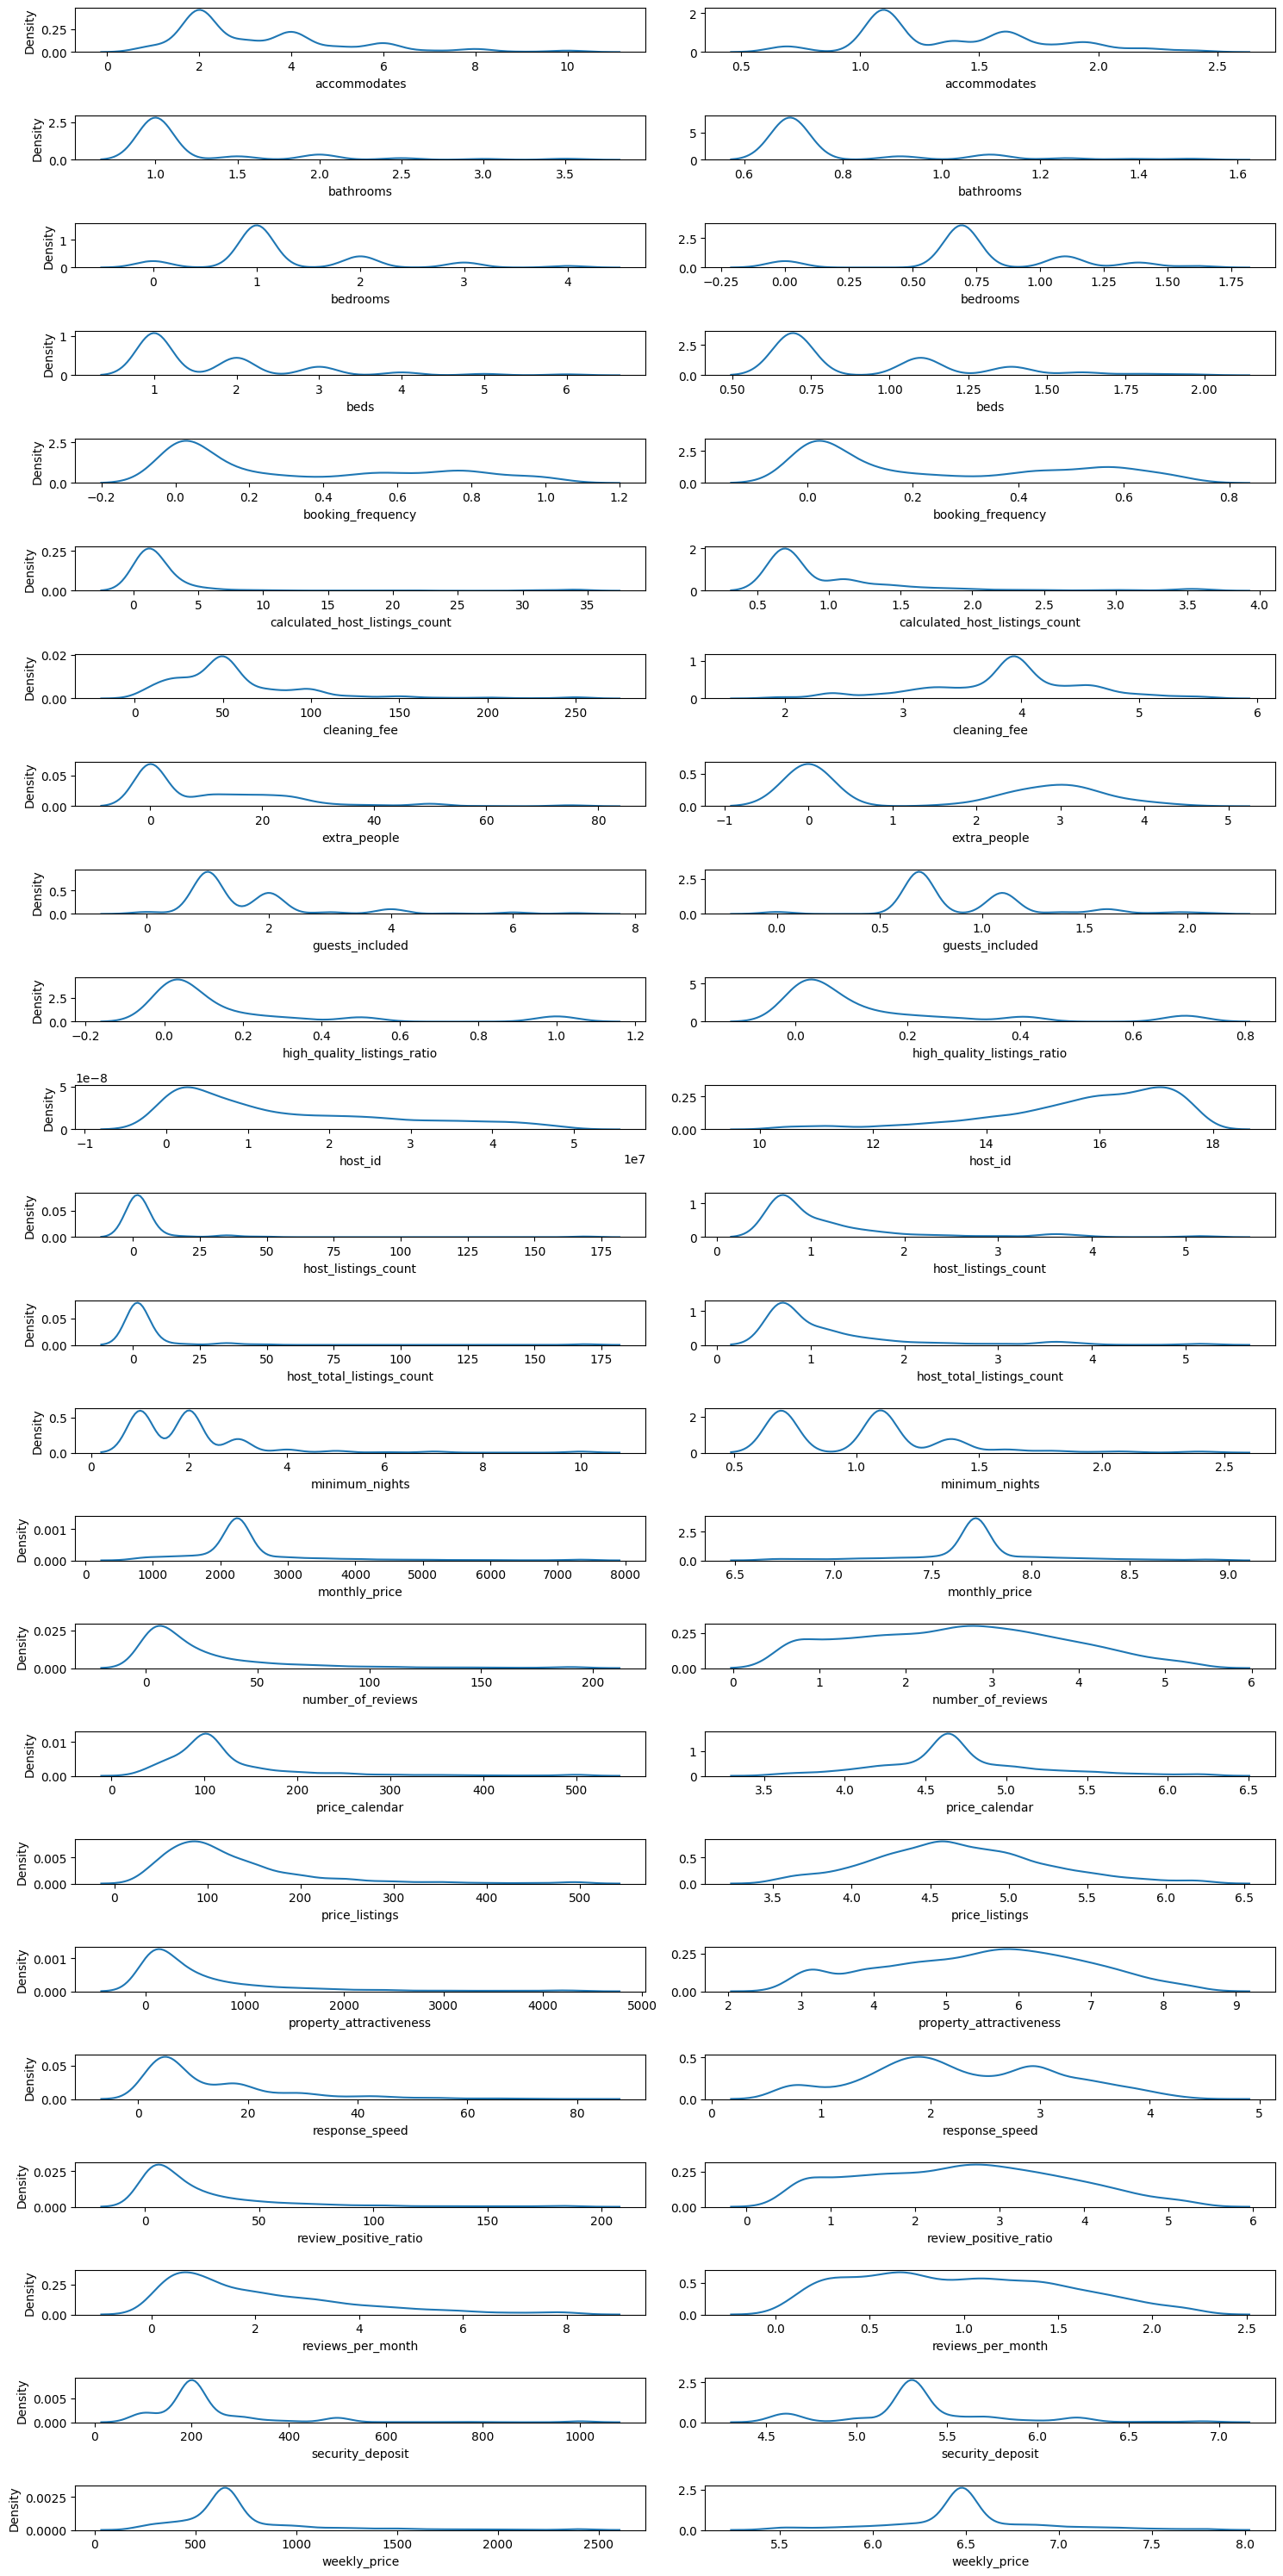

In [349]:
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,30))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(np.log(df[log_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

### **Yeo-Johnson Transformation**

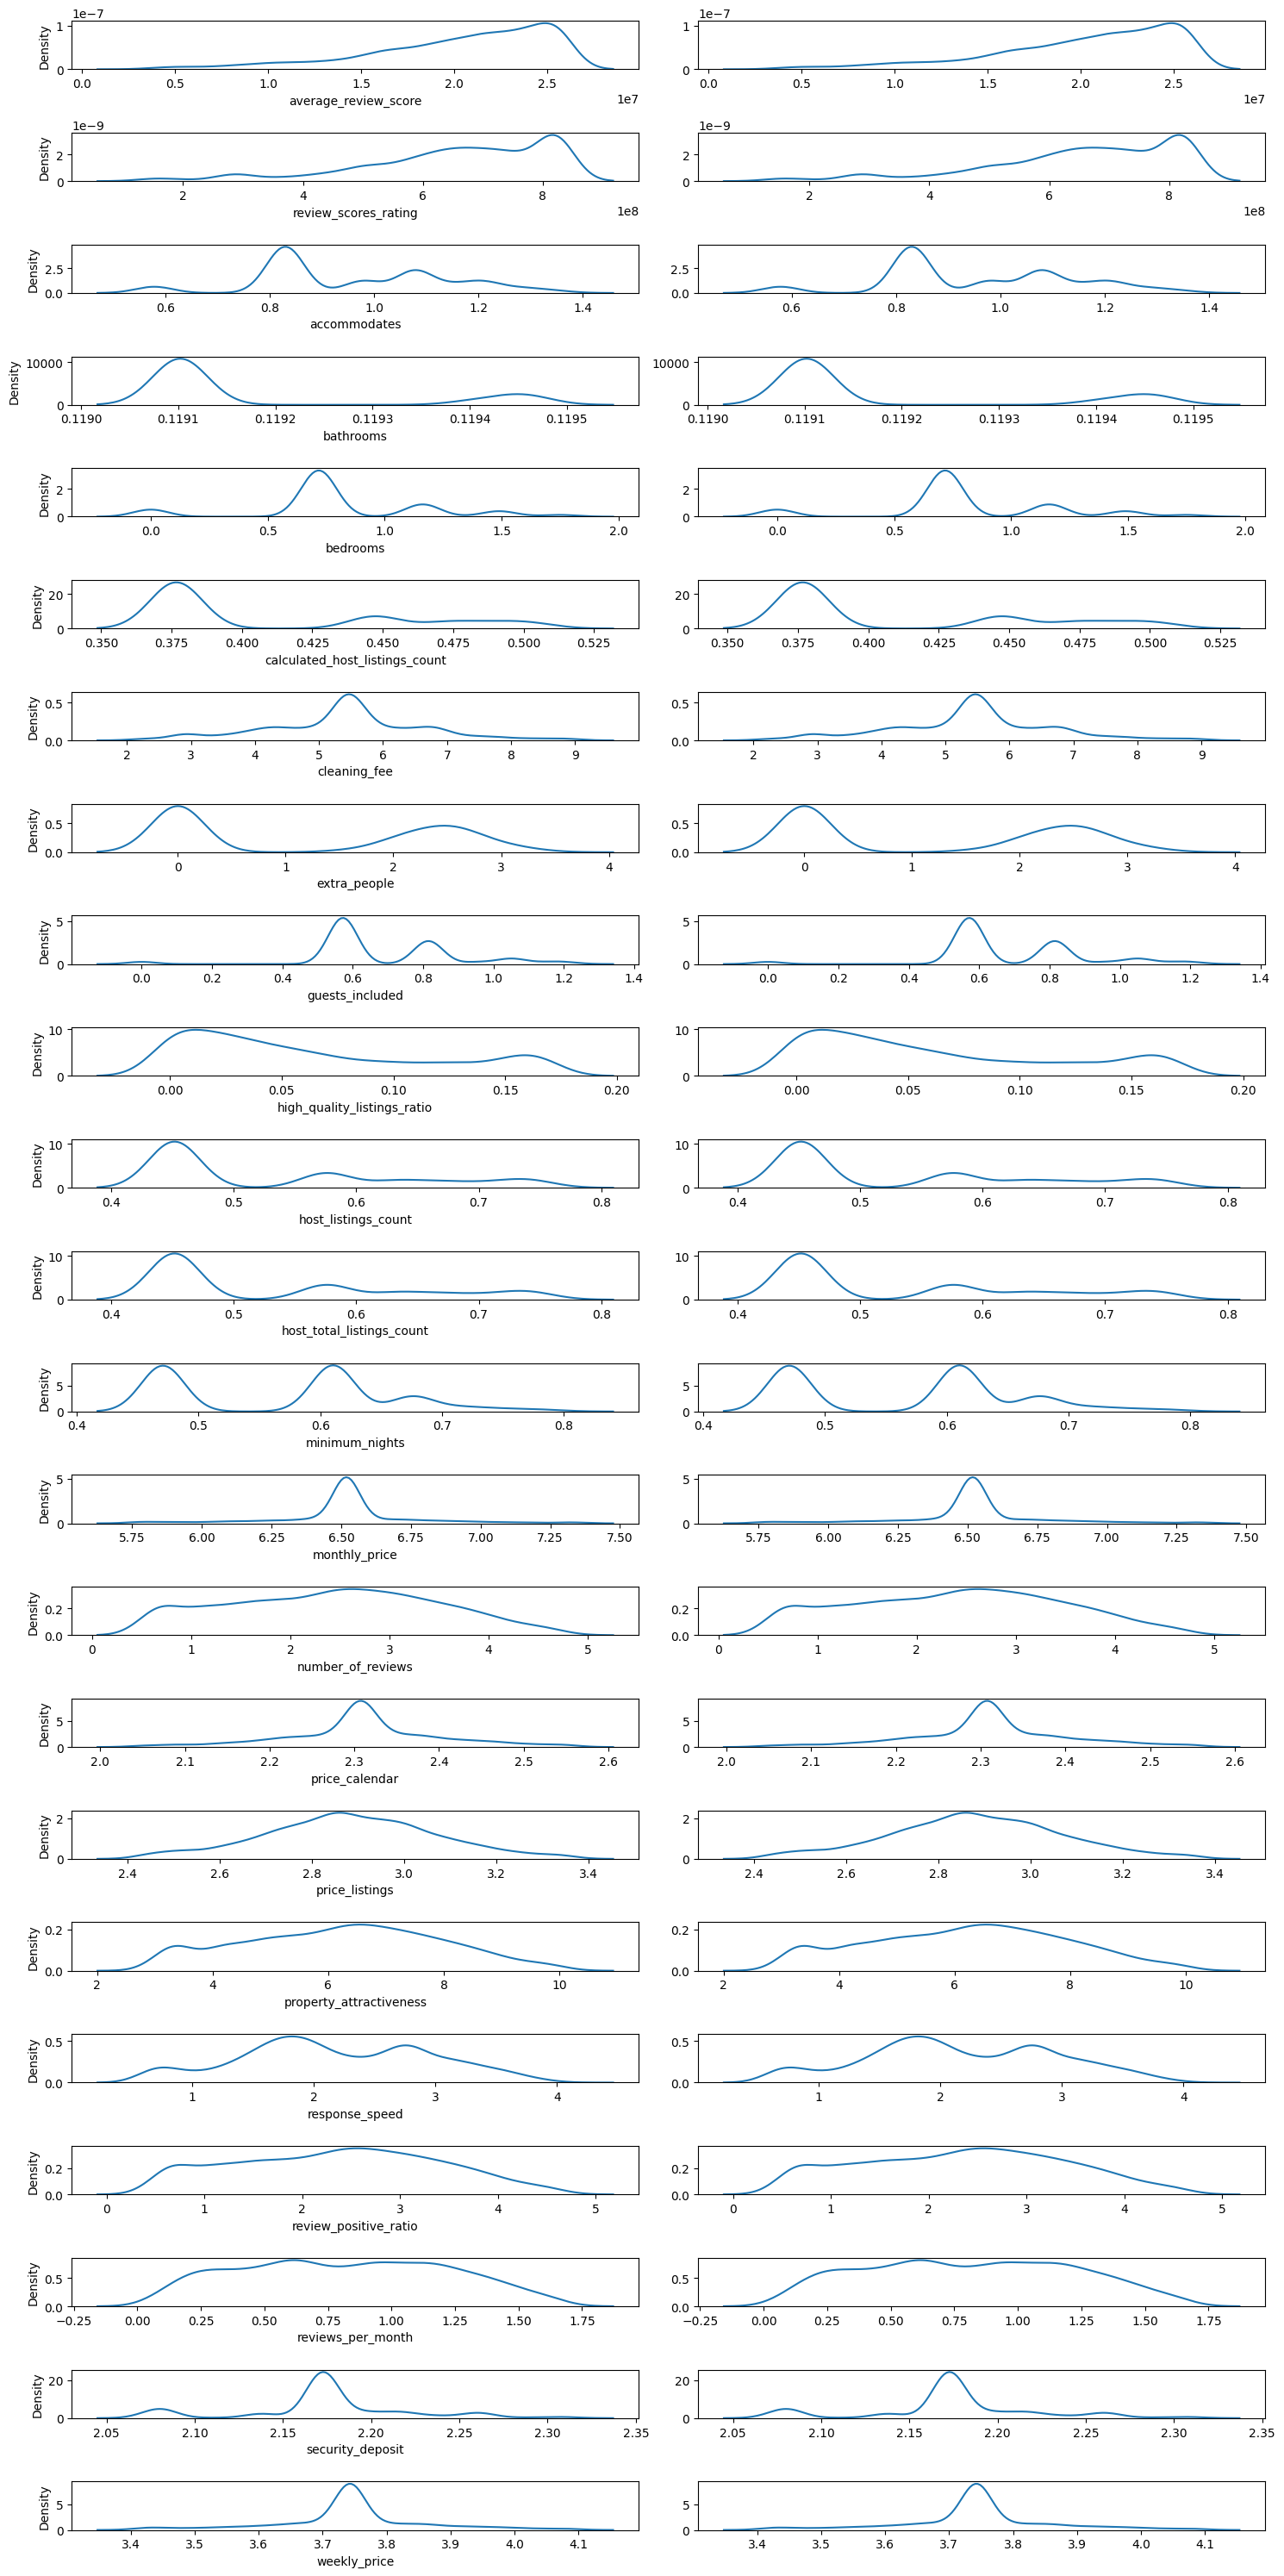

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import yeojohnson, boxcox

# Assuming 'df' is your DataFrame and 'log_cols' is defined
log_cols = ['average_review_score', 'review_scores_rating', 'accommodates', 'bathrooms',
    'bedrooms', 'calculated_host_listings_count', 'cleaning_fee', 'extra_people',
    'guests_included', 'high_quality_listings_ratio', 'host_listings_count',
    'host_total_listings_count', 'minimum_nights', 'monthly_price', 'number_of_reviews',
    'price_calendar', 'price_listings', 'property_attractiveness', 'response_speed',
    'review_positive_ratio', 'reviews_per_month', 'security_deposit', 'weekly_price']

fig, ax = plt.subplots(len(log_cols), 2, figsize=(15, 30))

for i in range(0, len(log_cols)):
    # Yeo-Johnson Transformation
    data, fitted_lambda = yeojohnson(df[log_cols[i]], lmbda=None)
    df[log_cols[i]] = data # Update the column in the DataFrame

    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

### **Kesimpulan**

Berdasarkan evaluasi terhadap beberapa fitur yang telah diproses menggunakan teknik transformasi sebelumnya, dapat disimpulkan bahwa distribusi nilai skewnessnya kini lebih seragam dan tidak menunjukkan variasi yang signifikan. Dengan demikian, dapat dikatakan bahwa penerapan teknik transformasi fitur yang telah dilakukan sudah tepat dan efektif.

## **📌 Feature Encoding (Categoric)**

In [351]:
for x in df.columns:
    unq = list(df[x].unique())
    try:
        # sorted_unq = sorted(unq) #jangan gunakan sorted
        sorted_unq = unq
    except TypeError:
        sorted_unq = unq
    print(f'===== {x} =====')
    if len(sorted_unq) >= 10:
        print(sorted_unq[:10] + ['.....'])
    else:
        print(sorted_unq)
    print()

===== id =====
[241032, 953595, 3308979, 278830, 5956968, 1909058, 856550, 4948745, 2493658, 175576, '.....']

===== listing_url =====
['https://www.airbnb.com/rooms/241032', 'https://www.airbnb.com/rooms/953595', 'https://www.airbnb.com/rooms/3308979', 'https://www.airbnb.com/rooms/278830', 'https://www.airbnb.com/rooms/5956968', 'https://www.airbnb.com/rooms/1909058', 'https://www.airbnb.com/rooms/856550', 'https://www.airbnb.com/rooms/4948745', 'https://www.airbnb.com/rooms/2493658', 'https://www.airbnb.com/rooms/175576', '.....']

===== scrape_id =====
[20160104002432]

===== last_scraped =====
[Timestamp('2016-01-04 00:00:00')]

===== name =====
['Stylish Queen Anne Apartment', 'Bright & Airy Queen Anne Apartment', 'New Modern House-Amazing water view', 'Charming craftsman 3 bdm house', 'Private unit in a 1920s mansion', 'Queen Anne Private Bed and Bath', 'Tiny Garden cabin on Queen Anne  ', 'Urban Charm || Downtown || Views', 'Airy + Bright Queen Anne Apartment', 'Private Apartme

### **Label Encoding**

In [352]:
from sklearn.preprocessing import LabelEncoder


categorical_cols = df.select_dtypes(include=['object', 'category','bool']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

id  listing_url       scrape_id last_scraped  name  summary  space  \
0   241032          446  20160104002432   2016-01-04  2738     1714    953   
1   953595         3140  20160104002432   2016-01-04   564      541    317   
2  3308979          700  20160104002432   2016-01-04  1946     1467   1229   
4   278830          553  20160104002432   2016-01-04   810      676    481   
5  5956968         1609  20160104002432   2016-01-04  2272     2743    772   

   description  experiences_offered  neighborhood_overview  notes  transit  \
0         1442                    0                   1924    132     2260   
1          594                    0                   1214   1729      465   
2         1579                    0                   1846    785      117   
4          736                    0                   1962    187     1468   
5         2966                    0                   1820    647     1243   

   thumbnail_url  medium_url  picture_url  xl_picture_url   host_id  host_url  \
0              0           0         1477               0    956883      2272   
1            165         165          178             165   5177328      1831   
2              0           0         3044               0  16708587       429   
4              0           0         1434               0   1452570       317   
5           2549        2549         2777            2549    326758      1227   

   host_name host_since  host_location  host_about  host_response_time  \
0        804 2011-08-11             79         634                   2   
1         57 2013-02-21             79        1187                   3   
2        579 2014-06-12             79        1781                   2   
4        380 2011-11-29             79         406                   3   
5         60 2010-12-25             79        1119                   3   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                  39                     1                  0   
1                  41                     1                  1   
2                  18                     1                  0   
4                   0                     1                  0   
5                   0                     1                  0   

   host_thumbnail_url  host_picture_url  host_neighbourhood  \
0                 653               653                  72   
1                 527               527                  72   
2                 781               781                  72   
4                 103               103                  72   
5                1998              1998                  72   

   host_listings_count  host_total_listings_count  host_verifications  \
0             0.630524                   0.630524                  61   
1             0.692189                   0.692189                  21   
2             0.575600                   0.575600                  42   
4             0.575600                   0.575600                  27   
5             0.451780                   0.451780                  27   

   host_has_profile_pic  host_identity_verified  street  \
0                     1                       1     737   
1                     1                       1     489   
2                     1                       1    1258   
4                     1                       1      62   
5                     1                       1    1244   

   neighbourhood_cleansed  neighbourhood_group_cleansed  city  state  zipcode  \
0                      81                            12     2      0       14   
1                      81                            12     2      0       14   
2                      81                            12     2      0       14   
4                      81                            12     2      0       14   
5                      81                            12     2      0       14   

   market  smart_location  country_code  country   latitude   longitude  \
0     

### **One Hot Encoding**

In [353]:
print(df['bed_type'].unique())

#df['bed_type'] = df['bed_type'].map({'Real Bed': 5, 'Pull-out Sofa': 4, 'Futon': 3, 'Airbed': 2, 'Couch': 1})

[4 2 3 0 1]


In [354]:
print(df['cancellation_policy'].unique())

#df['cancellation_policy'] = df['cancellation_policy'].map({'flexible': 3, 'moderate': 2, 'strict': 1})

[1 2 0]


In [355]:
print(df['room_type'].unique())

#df['room_type'] = df['room_type'].map({'Entire home/apt': 3, 'Private room': 2, 'Shared room': 1})

[0 1 2]


In [356]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the numerical features
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the scaled DataFrame
df[num_cols]

id  scrape_id   host_id  host_listings_count  \
0    -1.065885        0.0 -0.416767             1.000000   
1    -0.916000        0.0 -0.210147             1.344989   
2    -0.420556        0.0  0.354387             0.692719   
4    -1.057934        0.0 -0.392500             0.692719   
5     0.136436        0.0 -0.447616             0.000000   
...        ...        ...       ...                  ...   
3810 -1.061313        0.0 -0.396095             0.000000   
3811  0.687861        0.0  0.116424             0.000000   
3812 -0.404917        0.0 -0.295038             1.000000   
3813  0.587623        0.0  1.061332             1.650317   
3814  0.755979        0.0  1.816114             0.000000   

      host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
0                      1.000000  0.244733  -0.973553      0.403380   0.000000   
1                      1.344989  0.297669  -0.849324      0.403380   0.000000   
2                      0.692719  0.122111  -0.937805      1.497542   0.000360   
4                      0.692719  0.181775  -1.007062      0.927274   0.000349   
5                      0.000000  0.137079  -0.861091     -0.596620   0.000000   
...                         ...       ...        ...           ...        ...   
3810                   0.000000  0.579377  -0.546494      0.698954   0.000000   
3811                   0.000000  0.648347  -0.409445      0.000000   0.000000   
3812                   1.000000  0.585193  -0.674467      0.403380   0.000000   
3813                   1.650317  0.767833  -0.698722      0.927274   0.000349   
3814                   0.000000  0.492457   0.248555      0.403380   0.000000   

      bedrooms  beds  price_listings  weekly_price  monthly_price  \
0     0.000000   0.0       -0.241412      0.000000       0.000000   
1     0.000000   0.0        0.566935      2.683576       0.201672   
2     2.319901   5.0        1.972109      0.000000       0.000000   
4     1.734900   2.0        1.873061      0.000000       0.000000   
5     0.000000   0.0        0.261058      1.320461       0.000000   
...        ...   ...             ...           ...            ...   
3810  1.000000   2.0        0.602045      3.354386       0.618172   
3811  0.000000   0.0       -0.658416      0.000000       0.000000   
3812  0.000000   1.0       -0.075296     -0.522836      -0.015863   
3813  1.734900   2.0        1.629713      0.000000       0.000000   
3814  0.000000   1.0       -0.352891      0.000000       0.000000   

      security_deposit  cleaning_fee  guests_included  extra_people  \
0             0.000000      0.000000         1.000000      0.636770   
1            -0.091679     -0.316129         0.000000      0.000000   
2             0.136042      2.673025         2.643103      1.056112   
4             0.113024      1.433561         2.469928      0.926211   
5             0.000000     -0.316129         0.000000      1.101142   
...                ...           ...              ...           ...   
3810         -0.035014      0.802959         1.969923      1.223034   
3811          0.000000     -1.219575         0.000000      0.000000   
3812          0.088039      0.000000         1.000000      0.761013   
3813          0.000000      2.516391         0.000000      0.000000   
3814          0.088039      0.000000         1.580922      1.056112   

      minimum_nights  maximum_nights  availability_30  availability_60  \
0          -1.000000       -0.694698        -0.230769        -0.121951   
1           0.000000       -0.946069        -0.269231        -0.804878   
2           0.731390       -1.000914        -0.730769        -0.975610   
4          -1.000000        0.000000         0.384615         0.341463   
5          -1.000000       -1.022852        -0.769231        -1.121951   
...              ...             ...              ...              ...   
3810        0.000000       -1.015539        -0.269231        -0.073171   
3811       -1.000000        0.000000        

In [357]:
nan_counts = df[num_cols].isna().sum()

print(nan_counts)

has_nan = df[num_cols].isna().any().any()

if has_nan:
    print("Ada nilai NaN yang hadir di kolom numerik yang ditentukan")
else:
    print("Tidak ada nilai NaN yang ditemukan di kolom numerik yang ditentukan.")

id                                0
scrape_id                         0
host_id                           0
host_listings_count               0
host_total_listings_count         0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price_listings                    0
weekly_price                      0
monthly_price                     0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness   

### **Kesimpulan**

Berdasarkan hasil verifikasi fitur-fitur yang telah diproses menggunakan teknik encoding sebelumnya, diketahui bahwa semua nilai telah berubah menjadi numerik sesuai dengan yang ditentukan. Dengan demikian, dapat disimpulkan bahwa metode fitur encoding yang telah kami terapkan sudah valid dan akurat.

In [358]:
df.head()

id  listing_url  scrape_id last_scraped  name  summary  space  \
0 -1.065885          446        0.0   2016-01-04  2738     1714    953   
1 -0.916000         3140        0.0   2016-01-04   564      541    317   
2 -0.420556          700        0.0   2016-01-04  1946     1467   1229   
4 -1.057934          553        0.0   2016-01-04   810      676    481   
5  0.136436         1609        0.0   2016-01-04  2272     2743    772   

   description  experiences_offered  neighborhood_overview  notes  transit  \
0         1442                    0                   1924    132     2260   
1          594                    0                   1214   1729      465   
2         1579                    0                   1846    785      117   
4          736                    0                   1962    187     1468   
5         2966                    0                   1820    647     1243   

   thumbnail_url  medium_url  picture_url  xl_picture_url   host_id  host_url  \
0              0           0         1477               0 -0.416767      2272   
1            165         165          178             165 -0.210147      1831   
2              0           0         3044               0  0.354387       429   
4              0           0         1434               0 -0.392500       317   
5           2549        2549         2777            2549 -0.447616      1227   

   host_name host_since  host_location  host_about  host_response_time  \
0        804 2011-08-11             79         634                   2   
1         57 2013-02-21             79        1187                   3   
2        579 2014-06-12             79        1781                   2   
4        380 2011-11-29             79         406                   3   
5         60 2010-12-25             79        1119                   3   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                  39                     1                  0   
1                  41                     1                  1   
2                  18                     1                  0   
4                   0                     1                  0   
5                   0                     1                  0   

   host_thumbnail_url  host_picture_url  host_neighbourhood  \
0                 653               653                  72   
1                 527               527                  72   
2                 781               781                  72   
4                 103               103                  72   
5                1998              1998                  72   

   host_listings_count  host_total_listings_count  host_verifications  \
0             1.000000                   1.000000                  61   
1             1.344989                   1.344989                  21   
2             0.692719                   0.692719                  42   
4             0.692719                   0.692719                  27   
5             0.000000                   0.000000                  27   

   host_has_profile_pic  host_identity_verified  street  \
0                     1                       1     737   
1                     1                       1     489   
2                     1                       1    1258   
4                     1                       1      62   
5                     1                       1    1244   

   neighbourhood_cleansed  neighbourhood_group_cleansed  city  state  zipcode  \
0                      81                            12     2      0       14   
1                      81                            12     2      0       14   
2                      81                            12     2      0       14   
4                      81                            12     2      0       14   
5                      81                            12     2      0       14   

   market  smart_location  country_code  country  latitude  longitude  \
0       0               3        

## **📌 Data Splitting**

In [359]:
from sklearn.model_selection import train_test_split

# splitting tha data
df_train, df_test = train_test_split(df, test_size=0.30, stratify=df[['host_is_superhost']], random_state=42)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

print(df_train.shape)
print(df_test.shape)

(2233, 101)
(958, 101)


## **📌 Feature Selection**

### **1. Drop Unnecessary Feature**

In [360]:
df_train.drop(['id', 'listing_url', 'host_url', 'listing_id', 'host_id', 'street', 'notes', 'picture_url', 'xl_picture_url', 'host_picture_url','host_thumbnail_url', 'neighborhood_overview', 'transit','host_location','host_about','host_neighbourhood',
               'host_verifications', 'scrape_id', 'last_scraped', 'name', 'thumbnail_url', 'medium_url', 'host_name', 'experiences_offered','host_since','date', 'calendar_last_scraped', 'first_review', 'last_review' ], axis=1, inplace=True)

df_test.drop(['id', 'listing_url', 'host_url', 'listing_id', 'host_id', 'street', 'notes', 'picture_url', 'xl_picture_url', 'host_picture_url','host_thumbnail_url', 'neighborhood_overview', 'transit','host_location','host_about','host_neighbourhood',
               'host_verifications', 'scrape_id', 'last_scraped', 'name', 'thumbnail_url', 'medium_url', 'host_name', 'experiences_offered','host_since','date', 'calendar_last_scraped', 'first_review', 'last_review'], axis=1, inplace=True)

* Informasi URL dan Identitas: Kolom seperti listing_url, host_url, dan ID tidak relevan karena tidak berkontribusi pada analisis atau pembelajaran model.

* Informasi Visual dan Deskriptif: Kolom seperti picture_url, host_picture_url, dan neighborhood_overview yang bersifat informatif tetapi tidak terstruktur untuk analisis.

* Informasi Waktu dan Riwayat: Kolom seperti last_scraped, host_since, first_review, dan last_review dihapus untuk menyederhanakan dataset.

* Atribut Tambahan Lainnya: Kolom seperti name, notes, host_name, dan experiences_offered juga dihilangkan karena kurang relevan dalam konteks prediksi.

In [361]:
df_train

summary  space  description  host_response_time  host_response_rate  \
0         409   1932          449                   3                   0   
1         719    467          778                   2                   0   
2         110    870          127                   3                   0   
3        1548   2355         1665                   3                  42   
4        1527   2046         1644                   3                   0   
...       ...    ...          ...                 ...                 ...   
2228     2468   1838         2657                   3                   0   
2229     1745    624         1875                   2                   0   
2230      536     59          589                   3                   0   
2231      388   2069          427                   2                  33   
2232      597      0          657                   3                   0   

      host_acceptance_rate  host_is_superhost  host_listings_count  \
0                        1                  0             0.000000   
1                        1                  1             0.000000   
2                        1                  0             0.000000   
3                        1                  0             1.650317   
4                        1                  0             1.274071   
...                    ...                ...                  ...   
2228                     1                  0             0.000000   
2229                     1                  0             0.000000   
2230                     1                  1             0.692719   
2231                     1                  1             0.000000   
2232                     1                  0             0.000000   

      host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                      0.000000                     1                       1   
1                      0.000000                     1                       1   
2                      0.000000                     1                       1   
3                      1.650317                     1                       1   
4                      1.274071                     1                       1   
...                         ...                   ...                     ...   
2228                   0.000000                     1                       1   
2229                   0.000000                     1                       1   
2230                   0.692719                     1                       1   
2231                   0.000000                     1                       1   
2232                   0.000000                     1                       1   

      neighbourhood_cleansed  neighbourhood_group_cleansed  city  state  \
0                         79                            11     2      0   
1                          2                            16     2      0   
2                         47                             4     2      0   
3                         12                             6     2      0   
4                         42                             4     2      0   
...                      ...                           ...   ...    ...   
2228                      56                             8     2      0   
2229                      26                            11     2      0   
2230                      21                            11     2      0   
2231                      41                             4     2      0   
2232                      59                            10     2      0   

      zipcode  market  smart_location  country_code  country  latitude  \
0           2       0               3             0        0  0.602281   
1          23       0               3             0        0 -1.920002   
2          16       0               3             0        0 -0.274683   
3           0       0               3             0        0 -0.319472

### **2. Univariate Selection**

In [362]:
# define X and y
X_train = df_train.drop(['host_is_superhost'], axis=1) #features
y_train = df_train['host_is_superhost'] #target

- #### **ANOVA F-value**

`ANOVA F-value` memperkirakan derajat linearitas antara fitur input (yaitu, fitur independen) dan fitur output (yaitu, fitur dependen). Nilai F yang tinggi menunjukkan derajat linearitas yang tinggi dan nilai F yang rendah menunjukkan derajat linearitas yang rendah.

Scikit-learn menyediakan dua fungsi untuk menghitung nilai F:

1. `sklearn.feature_selection.f_regression` for regression problems
2. `sklearn.feature_selection.f_classif` for classification problems

Kekurangan:

Nilai F ANOVA hanya menangkap hubungan linear antara fitur input dan fitur output.|

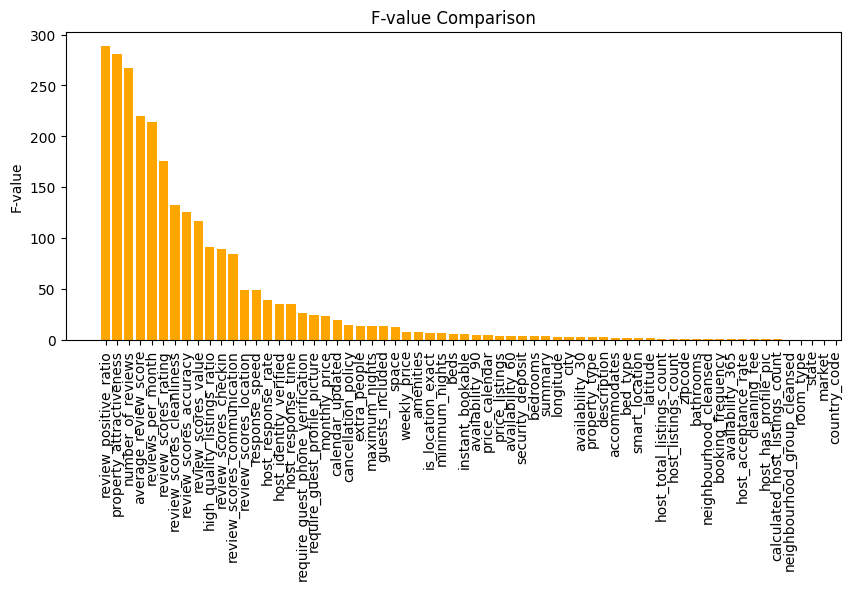

In [363]:
from sklearn.feature_selection import f_classif
feature_names = X_train.columns

# create f_classif object
f_value = f_classif(X_train, y_train)

# print the name and F-value of each feature
# for feature in zip(feature_names, f_value[0]):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "f_value":f_value[0]
}).sort_values("f_value", ascending=False)

# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="f_value", color="orange")
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.show()

* Mengambil 20 top feature

In [364]:
feature_importance = []
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['review_positive_ratio',
 'property_attractiveness',
 'number_of_reviews',
 'average_review_score',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_value',
 'high_quality_listings_ratio',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'response_speed',
 'host_response_rate',
 'host_identity_verified',
 'host_response_time',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'monthly_price']

- #### **Variance Threshold**

Variance Threshold menghapus fitur-fitur yang variansinya di bawah nilai `threshold` yang telah ditentukan. Secara default, ini menghapus semua fitur dengan varians nol, yaitu fitur yang memiliki nilai yang sama di semua sampel.

Keuntungan:

Ini dapat digunakan untuk pembelajaran tanpa pengawasan (unsupervised learning).

Kekurangan:

Variance Threshold hanya mempertimbangkan hubungan antar fitur, tetapi tidak mempertimbangkan hubungan antara fitur input dengan fitur output.

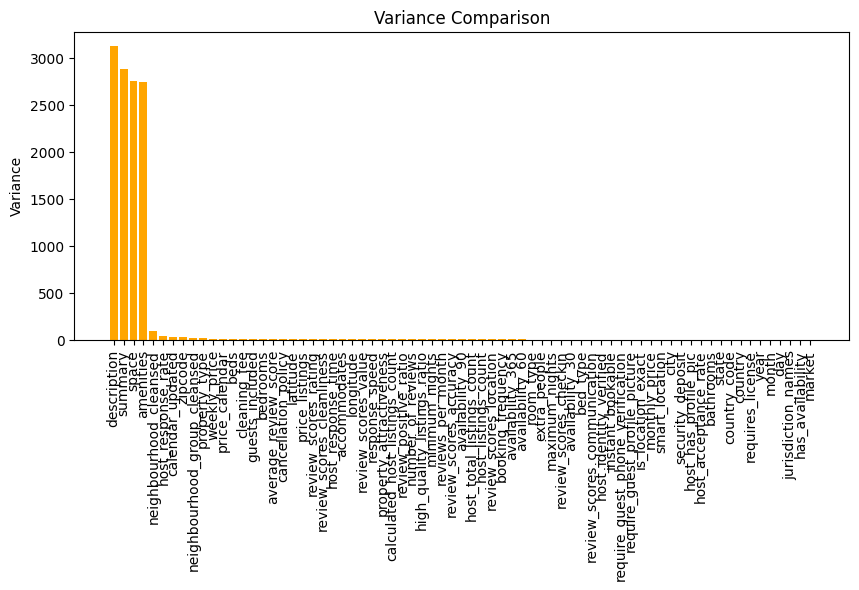

In [365]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
# create VarianceThreshold object
selector = VarianceThreshold(threshold=0.0)
# train and transform
selector.fit_transform(X_train)
# print the name and variance of each feature
# for feature in zip(feature_names, selector.variances_):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "variances":selector.variances_
}).sort_values("variances", ascending=False)

# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="variances", color="orange")
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.show()

In [366]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['review_positive_ratio',
 'property_attractiveness',
 'number_of_reviews',
 'average_review_score',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_value',
 'high_quality_listings_ratio',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'response_speed',
 'host_response_rate',
 'host_identity_verified',
 'host_response_time',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'monthly_price',
 'description',
 'summary',
 'space',
 'amenities',
 'neighbourhood_cleansed',
 'calendar_updated',
 'zipcode',
 'neighbourhood_group_cleansed',
 'property_type',
 'weekly_price',
 'price_calendar',
 'beds',
 'cleaning_fee',
 'guests_included',
 'bedrooms',
 'cancellation_policy',
 'latitude',
 'price_listings']

- #### **Mutual information**

Informasi mutual (MI) mengukur ketergantungan satu variabel terhadap variabel lainnya dengan mengkuantifikasi jumlah informasi yang diperoleh tentang satu fitur melalui fitur lainnya. MI bersifat simetris dan tidak negatif, serta sama dengan nol jika dan hanya jika dua variabel acak independen, dan nilai yang lebih tinggi menunjukkan ketergantungan yang lebih tinggi.

Scikit-learn menyediakan dua fungsi untuk menghitung nilai MI:

- `sklearn.feature_selection.mutual_info_regression` for regression problems
- `sklearn.feature_selection.mutual_info_classif` for classification problems

Keuntungan:

MI dapat menangkap hubungan non-linear antara fitur input dan fitur output.

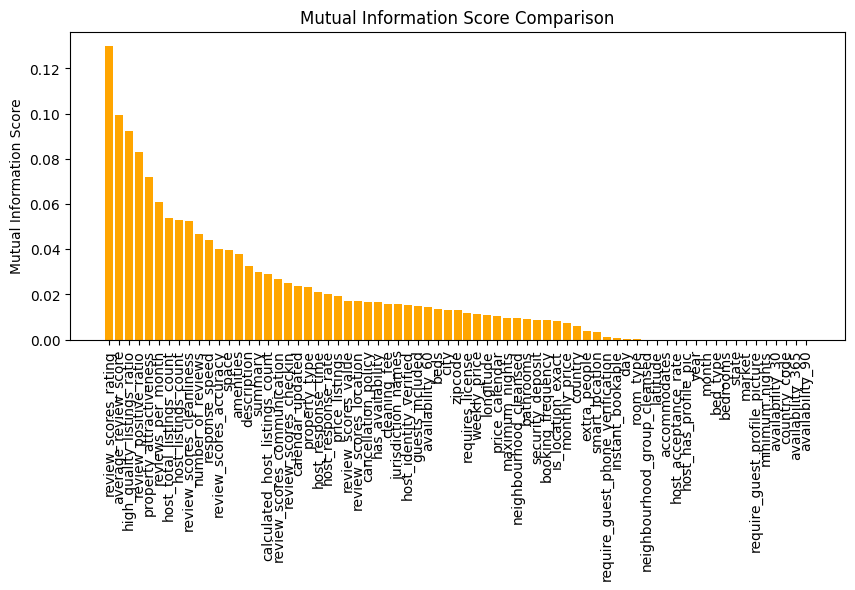

In [367]:
# import mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
# create mutual_info_classif object
MI_score = mutual_info_classif(X_train, y_train, random_state=0)
# Print the name and mutual information score of each feature
# for feature in zip(feature_names, MI_score):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "MI_score":MI_score
}).sort_values("MI_score", ascending=False)

# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="MI_score", color="orange")
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.show()

In [368]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['review_positive_ratio',
 'property_attractiveness',
 'number_of_reviews',
 'average_review_score',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_value',
 'high_quality_listings_ratio',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'response_speed',
 'host_response_rate',
 'host_identity_verified',
 'host_response_time',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'monthly_price',
 'description',
 'summary',
 'space',
 'amenities',
 'neighbourhood_cleansed',
 'calendar_updated',
 'zipcode',
 'neighbourhood_group_cleansed',
 'property_type',
 'weekly_price',
 'price_calendar',
 'beds',
 'cleaning_fee',
 'guests_included',
 'bedrooms',
 'cancellation_policy',
 'latitude',
 'price_listings',
 'host_total_listings_count',
 'host_listings_count',
 'calculated_host_listings_count']

- #### **Scikit-learn’s SelectKBest**

SelectKBest memilih fitur-fitur menggunakan sebuah fungsi (dalam hal ini nilai F ANOVA) dan kemudian "menghapus semua kecuali k fitur dengan skor tertinggi".

Uji statistik dapat digunakan untuk memilih fitur-fitur yang memiliki hubungan terkuat dengan variabel output. `Mutual information, ANOVA F-test dan chi square` adalah beberapa metode paling populer untuk Univariate Feature Selection.

---

Jika transformasi data tidak memungkinkan karena suatu alasan (misalnya, nilai negatif adalah faktor penting), maka kita harus memilih statistik lain untuk menilai fitur kita:

```
sklearn.feature_selection.f_classif computes ANOVA f-value
sklearn.feature_selection.mutual_info_classif
```

In [369]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# apply SelectKBest class to extract top 10 best features

# computes chi2
# semuanya harus positif
# bestfeatures = SelectKBest(score_func=chi2, k=10)

# computes ANOVA f-value
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values('Score', ascending=False, inplace=True)
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                          Specs       Score
67        review_positive_ratio  288.605409
66      property_attractiveness  280.921634
45            number_of_reviews  266.811416
65         average_review_score  220.148624
60            reviews_per_month  214.398455
46         review_scores_rating  175.467189
48    review_scores_cleanliness  132.216239
47       review_scores_accuracy  125.833555
52          review_scores_value  116.613537
69  high_quality_listings_ratio   91.088566


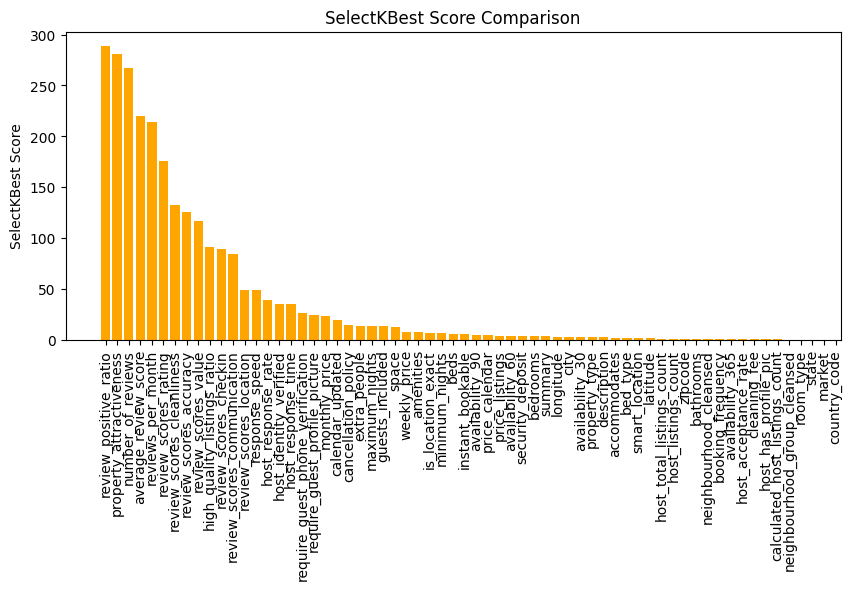

In [370]:
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=featureScores, x="Specs", height="Score", color="orange")
plt.xticks(rotation="vertical")
plt.ylabel("SelectKBest Score")
plt.title("SelectKBest Score Comparison")
plt.show()

In [371]:
for i in featureScores["Specs"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['review_positive_ratio',
 'property_attractiveness',
 'number_of_reviews',
 'average_review_score',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_value',
 'high_quality_listings_ratio',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'response_speed',
 'host_response_rate',
 'host_identity_verified',
 'host_response_time',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'monthly_price',
 'description',
 'summary',
 'space',
 'amenities',
 'neighbourhood_cleansed',
 'calendar_updated',
 'zipcode',
 'neighbourhood_group_cleansed',
 'property_type',
 'weekly_price',
 'price_calendar',
 'beds',
 'cleaning_fee',
 'guests_included',
 'bedrooms',
 'cancellation_policy',
 'latitude',
 'price_listings',
 'host_total_listings_count',
 'host_listings_count',
 'calculated_host_listings_count']

### **3. Feature Importance**

Kita dapat memperoleh tingkat kepentingan setiap fitur dalam dataset dengan menggunakan properti feature importance dari model yang digunakan.

Feature importance memberikan skor untuk setiap fitur dalam data. Semakin tinggi skor yang diberikan, semakin penting atau relevan fitur tersebut terhadap variabel target (output).

Feature importance merupakan kelas bawaan yang tersedia pada algoritma berbasis pohon keputusan (Tree-Based Classifiers). Dalam hal ini, kita akan menggunakan algoritma Extra Trees Classifier untuk mengekstraksi 10 fitur teratas dari dataset.

[1.40219087e-02 1.62568382e-02 1.48095679e-02 1.43458084e-02
 1.29676306e-02 1.74360756e-05 1.70313514e-02 1.83105282e-02
 6.90244730e-04 9.19250417e-03 1.39831583e-02 1.49789797e-02
 2.64114164e-04 0.00000000e+00 1.51906317e-02 0.00000000e+00
 2.21532748e-04 0.00000000e+00 0.00000000e+00 1.37132466e-02
 1.50036103e-02 5.08880211e-03 1.41192670e-02 9.27854020e-03
 1.29418921e-02 8.68598285e-03 9.19229790e-03 1.10703604e-02
 3.95223307e-03 1.63801301e-02 1.37448305e-02 1.53238182e-02
 1.50470307e-02 1.39218333e-02 1.40262312e-02 1.34354936e-02
 1.46163902e-02 1.41315497e-02 1.41452069e-02 1.46707533e-02
 0.00000000e+00 1.28630015e-02 1.35097822e-02 1.36124533e-02
 1.38791251e-02 4.12702692e-02 5.79185294e-02 2.19560035e-02
 2.58383723e-02 1.10877256e-02 9.85192187e-03 1.17803504e-02
 2.55012902e-02 0.00000000e+00 0.00000000e+00 8.36576756e-03
 1.41644965e-02 9.01239578e-03 9.50365682e-03 1.49098095e-02
 3.11403699e-02 1.32272670e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.860066

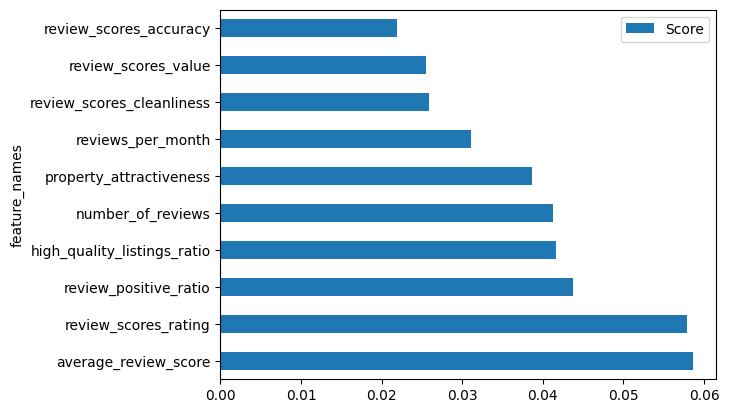

In [372]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances = pd.DataFrame(feat_importances).reset_index(names="feature_names") \
    .rename(columns={0:"Score"}) \
    .sort_values("Score", ascending=False).reset_index(drop=True)
feat_importances.nlargest(10, "Score").plot(x="feature_names", y="Score", kind='barh')
plt.show()

In [373]:
for i in feat_importances["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['review_positive_ratio',
 'property_attractiveness',
 'number_of_reviews',
 'average_review_score',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_value',
 'high_quality_listings_ratio',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'response_speed',
 'host_response_rate',
 'host_identity_verified',
 'host_response_time',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'monthly_price',
 'description',
 'summary',
 'space',
 'amenities',
 'neighbourhood_cleansed',
 'calendar_updated',
 'zipcode',
 'neighbourhood_group_cleansed',
 'property_type',
 'weekly_price',
 'price_calendar',
 'beds',
 'cleaning_fee',
 'guests_included',
 'bedrooms',
 'cancellation_policy',
 'latitude',
 'price_listings',
 'host_total_listings_count',
 'host_listings_count',
 'calculated_host_listings_count',
 'longitude']

### **4. Correlation Matrix with Heatmap**

Definisi Korelasi:
Korelasi menunjukkan bagaimana suatu fitur saling berhubungan satu sama lain atau terhadap variabel target. Korelasi dapat bersifat:

* Positif: Peningkatan nilai pada satu fitur menyebabkan peningkatan nilai pada variabel target.

* Negatif: Peningkatan nilai pada satu fitur menyebabkan penurunan nilai pada variabel target.

* Visualisasi dengan Heatmap:
Heatmap membantu kita mengidentifikasi fitur mana yang memiliki hubungan paling kuat dengan variabel target. Untuk itu, kita akan memvisualisasikan korelasi antar fitur menggunakan heatmap dari library Seaborn.

* Mengatasi Redundansi Antar Fitur:
Dalam analisis korelasi antar fitur, penting untuk memeriksa adanya fitur yang saling redundan (memiliki korelasi tinggi satu sama lain). Dalam kasus tersebut, salah satu fitur dapat dihapus, terutama fitur dengan korelasi rendah terhadap variabel target (response). Hal ini bertujuan untuk mengurangi multikolinearitas dan meningkatkan efisiensi model.

<Axes: >

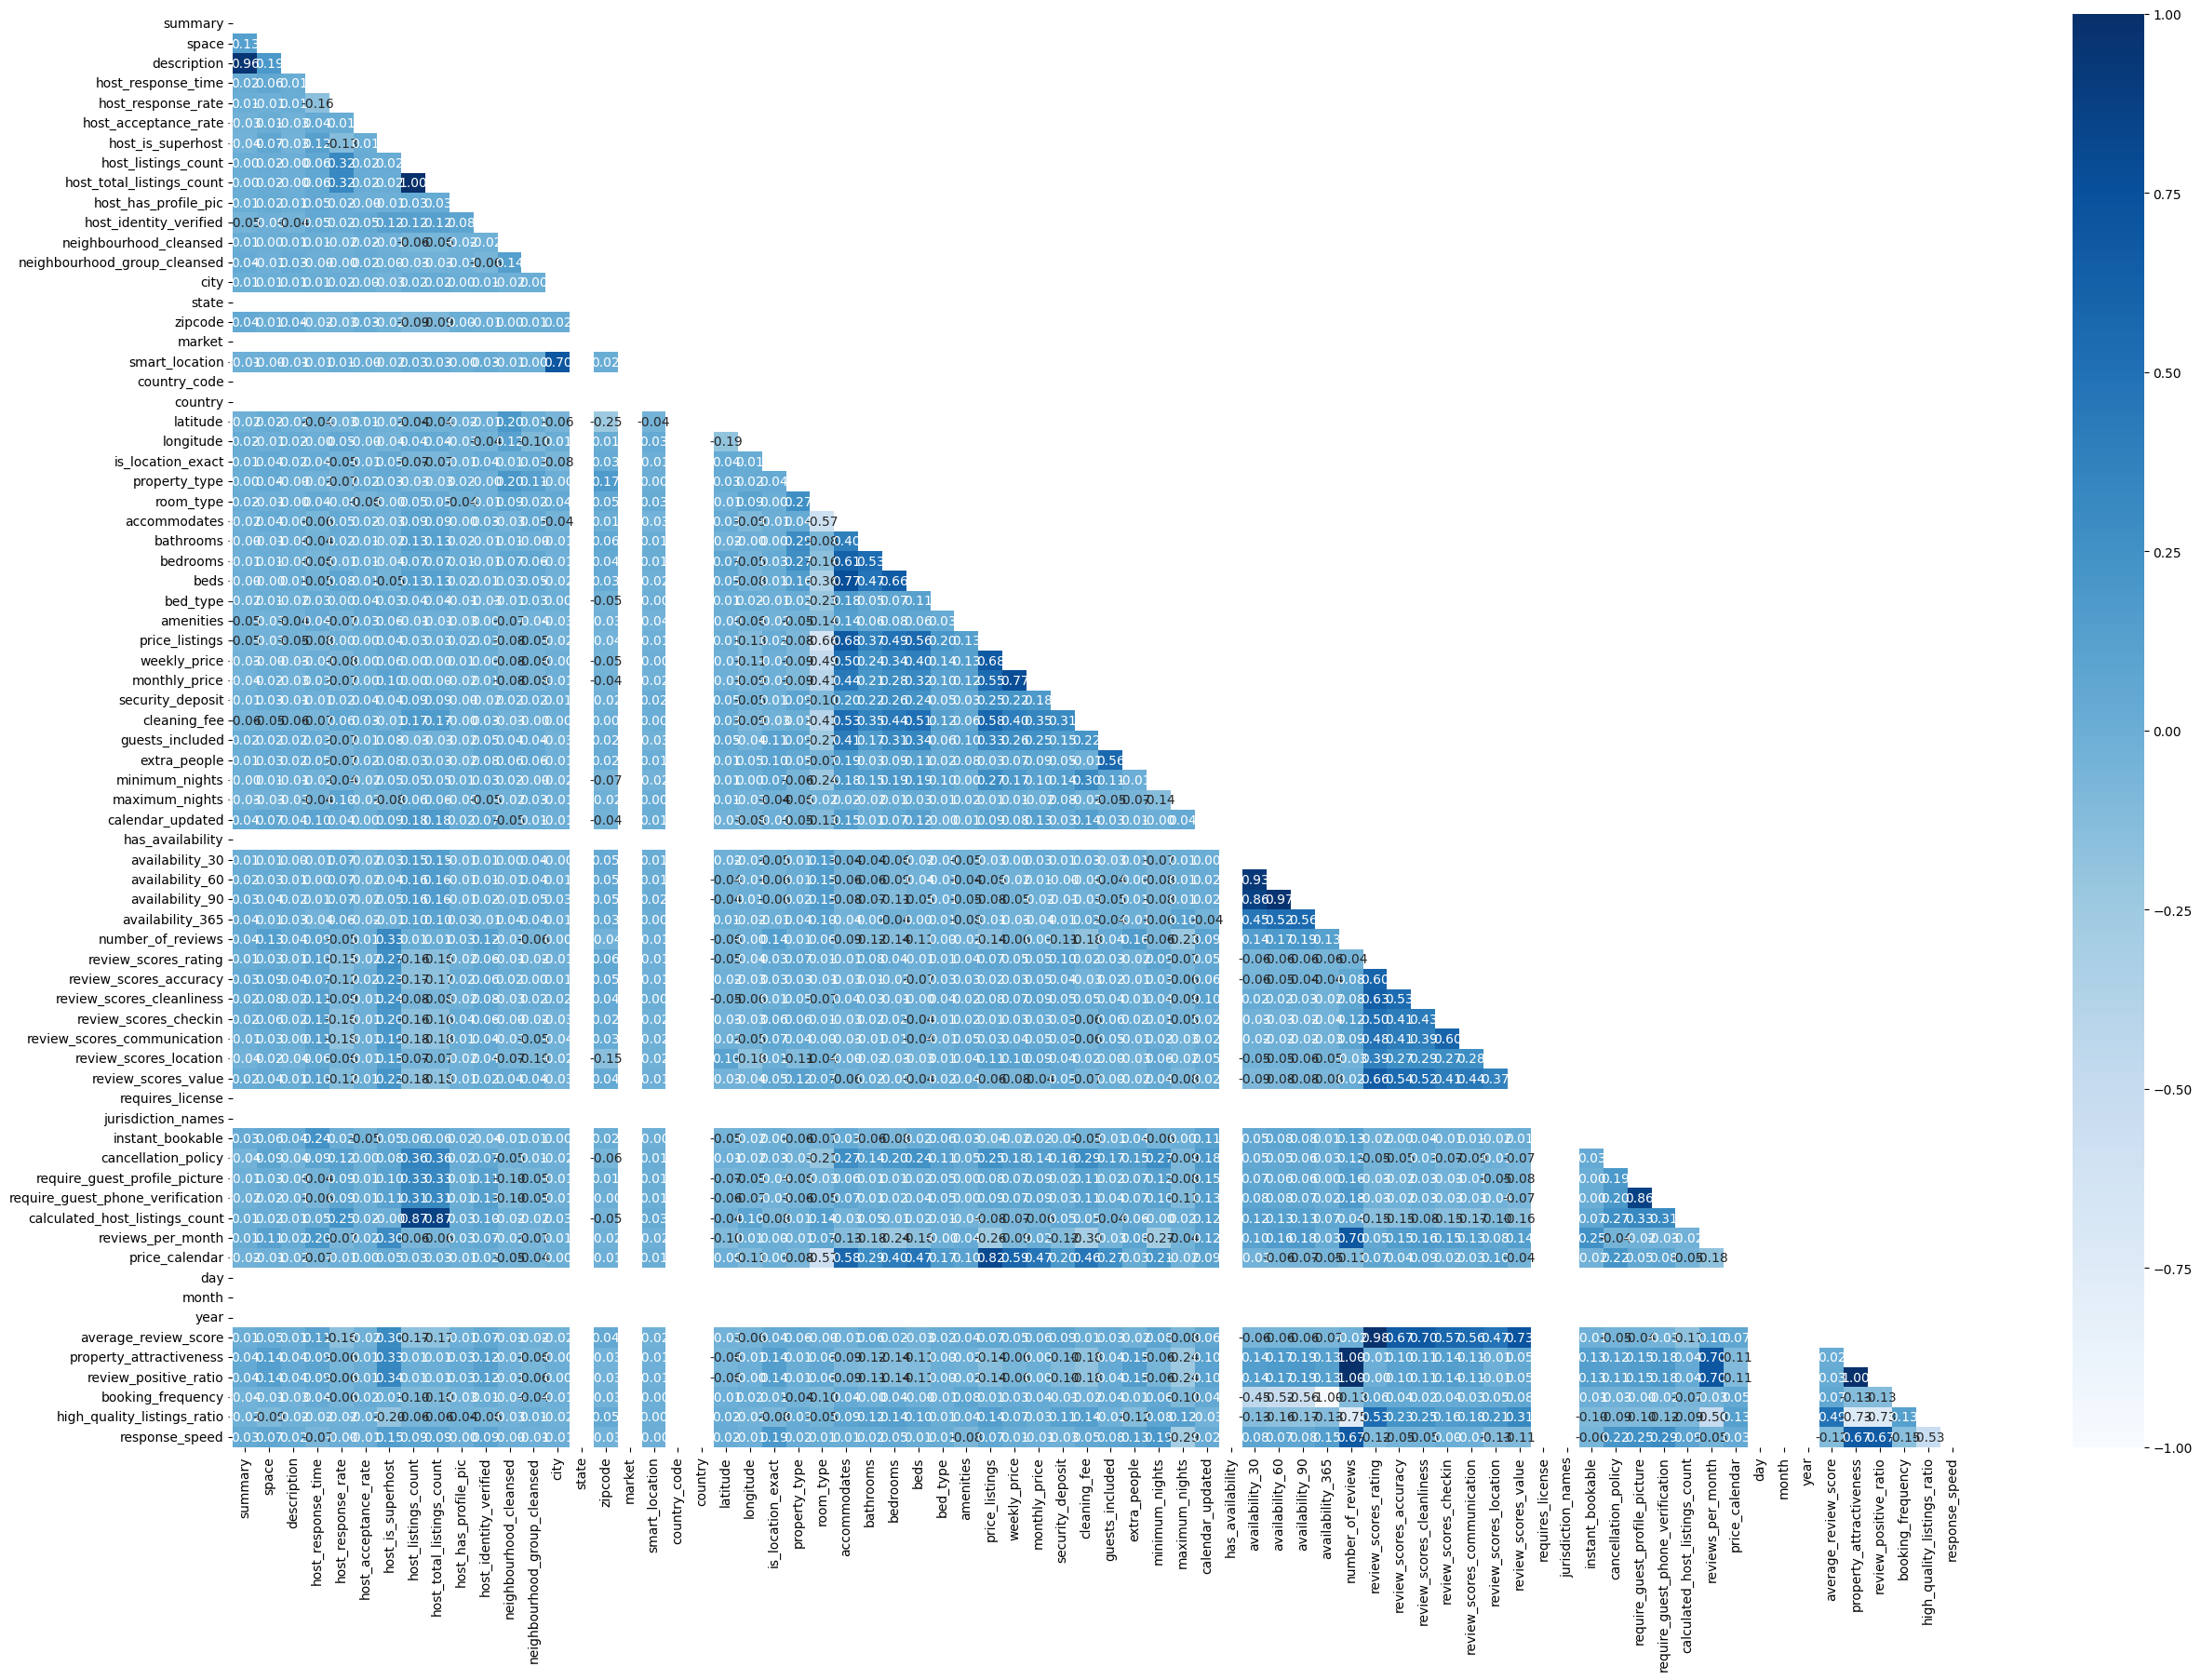

In [374]:
plt.figure(figsize=(30,20))
corr = df_train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Checking Correlation with Target host_is_superhost**

In [375]:
corr = df_train.corrwith(df_train["host_is_superhost"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr = corr.sort_values('corr value', ascending=False, ignore_index=True)
corr.head(10)

index  corr value Corr Type
0          host_is_superhost    1.000000   Positif
1      review_positive_ratio    0.338443   Positif
2    property_attractiveness    0.334418   Positif
3          number_of_reviews    0.326830   Positif
4       average_review_score    0.299691   Positif
5          reviews_per_month    0.296098   Positif
6       review_scores_rating    0.270027   Positif
7  review_scores_cleanliness    0.236532   Positif
8     review_scores_accuracy    0.231065   Positif
9        review_scores_value    0.222875   Positif

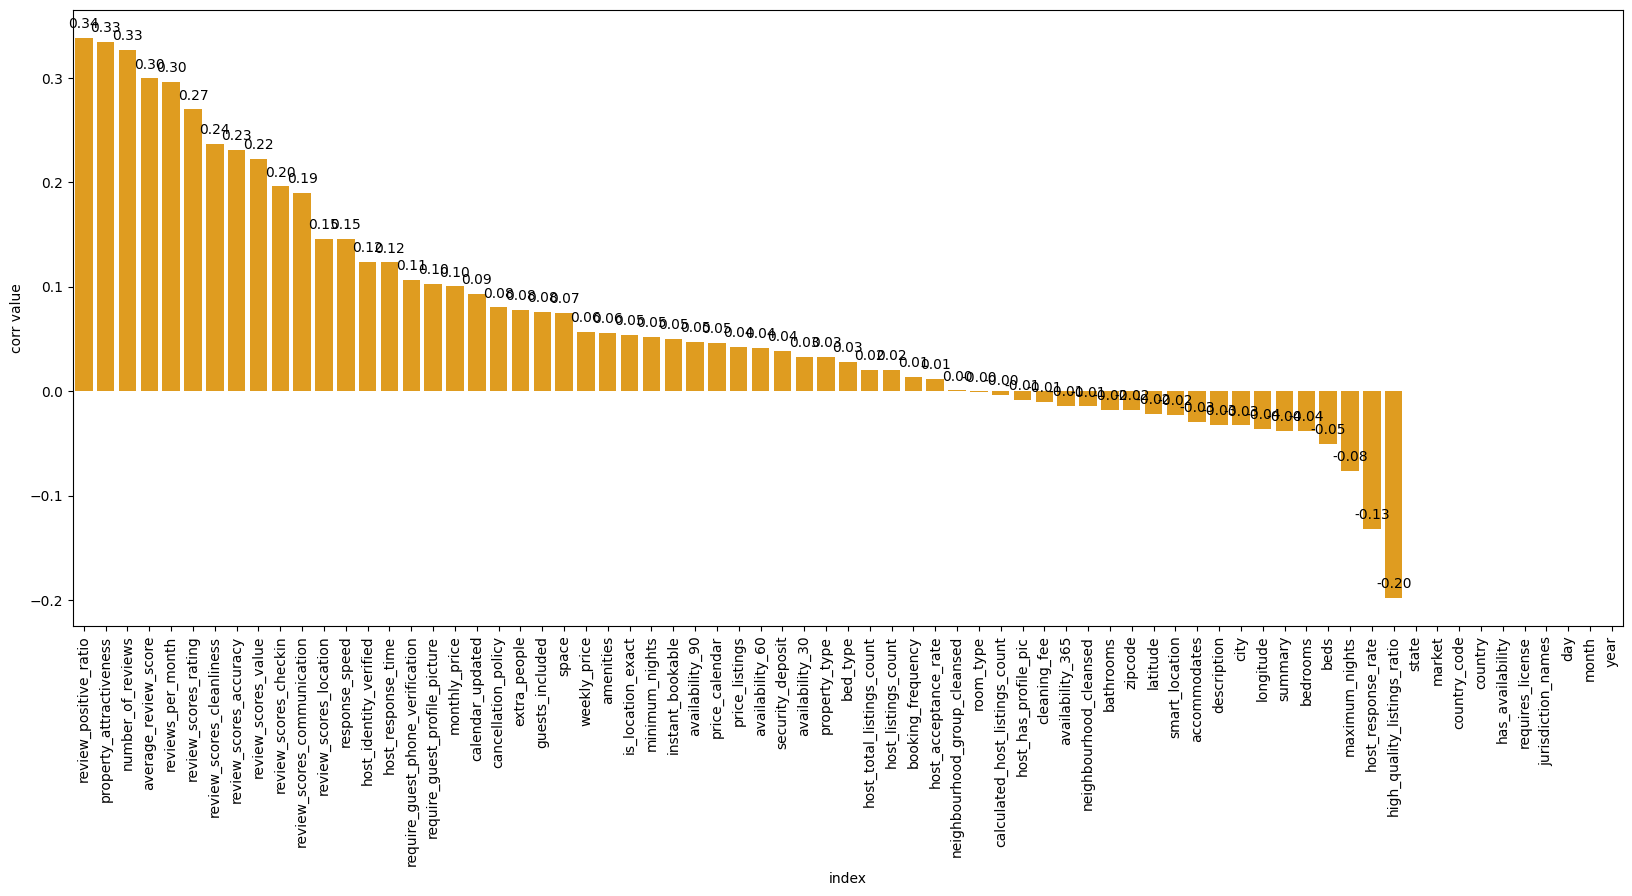

In [376]:
corr = df_train.corrwith(df_train["host_is_superhost"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='orange')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

In [377]:
target = "host_is_superhost"
high_corr_cols = [i for i in list(corr[corr["corr value"] > 0.15]["index"].values) if i != target]
print(high_corr_cols)

['review_positive_ratio', 'property_attractiveness', 'number_of_reviews', 'average_review_score', 'reviews_per_month', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_value', 'review_scores_checkin', 'review_scores_communication']


Mengambil 20 top feature yang memiliki nilai terbaik

In [378]:
for i in corr["index"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance

['review_positive_ratio',
 'property_attractiveness',
 'number_of_reviews',
 'average_review_score',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_value',
 'high_quality_listings_ratio',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'response_speed',
 'host_response_rate',
 'host_identity_verified',
 'host_response_time',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'monthly_price',
 'description',
 'summary',
 'space',
 'amenities',
 'neighbourhood_cleansed',
 'calendar_updated',
 'zipcode',
 'neighbourhood_group_cleansed',
 'property_type',
 'weekly_price',
 'price_calendar',
 'beds',
 'cleaning_fee',
 'guests_included',
 'bedrooms',
 'cancellation_policy',
 'latitude',
 'price_listings',
 'host_total_listings_count',
 'host_listings_count',
 'calculated_host_listings_count',
 'longitude']

### **5. Multicollinearity Check (Drop Redundancy)**

Definisi Multikolinearitas:
Multikolinearitas terjadi ketika variabel independen dalam model saling berkorelasi. Kondisi ini dapat:

* Mengurangi kinerja model.
* Menurunkan signifikansi statistik dari variabel independen, sehingga sulit untuk menentukan pengaruh individual suatu fitur terhadap variabel target.


Pemeriksaan Redundansi Fitur:
Dari fitur-fitur yang telah dipilih (hasil gabungan Top 20 Features), kita akan melakukan pengecekan ulang untuk mendeteksi redundansi antar fitur.

Fitur-fitur dengan korelasi antar fitur yang tinggi (di atas ambang batas, misalnya `threshold > 0.70`) akan diidentifikasi.
Selanjutnya, fitur-fitur tersebut akan dibandingkan korelasinya terhadap variabel target. Salah satu fitur dengan korelasi lebih rendah terhadap target akan dihapus untuk mengurangi redundansi.

#### **1. Correlation Coefficient**

<Axes: >

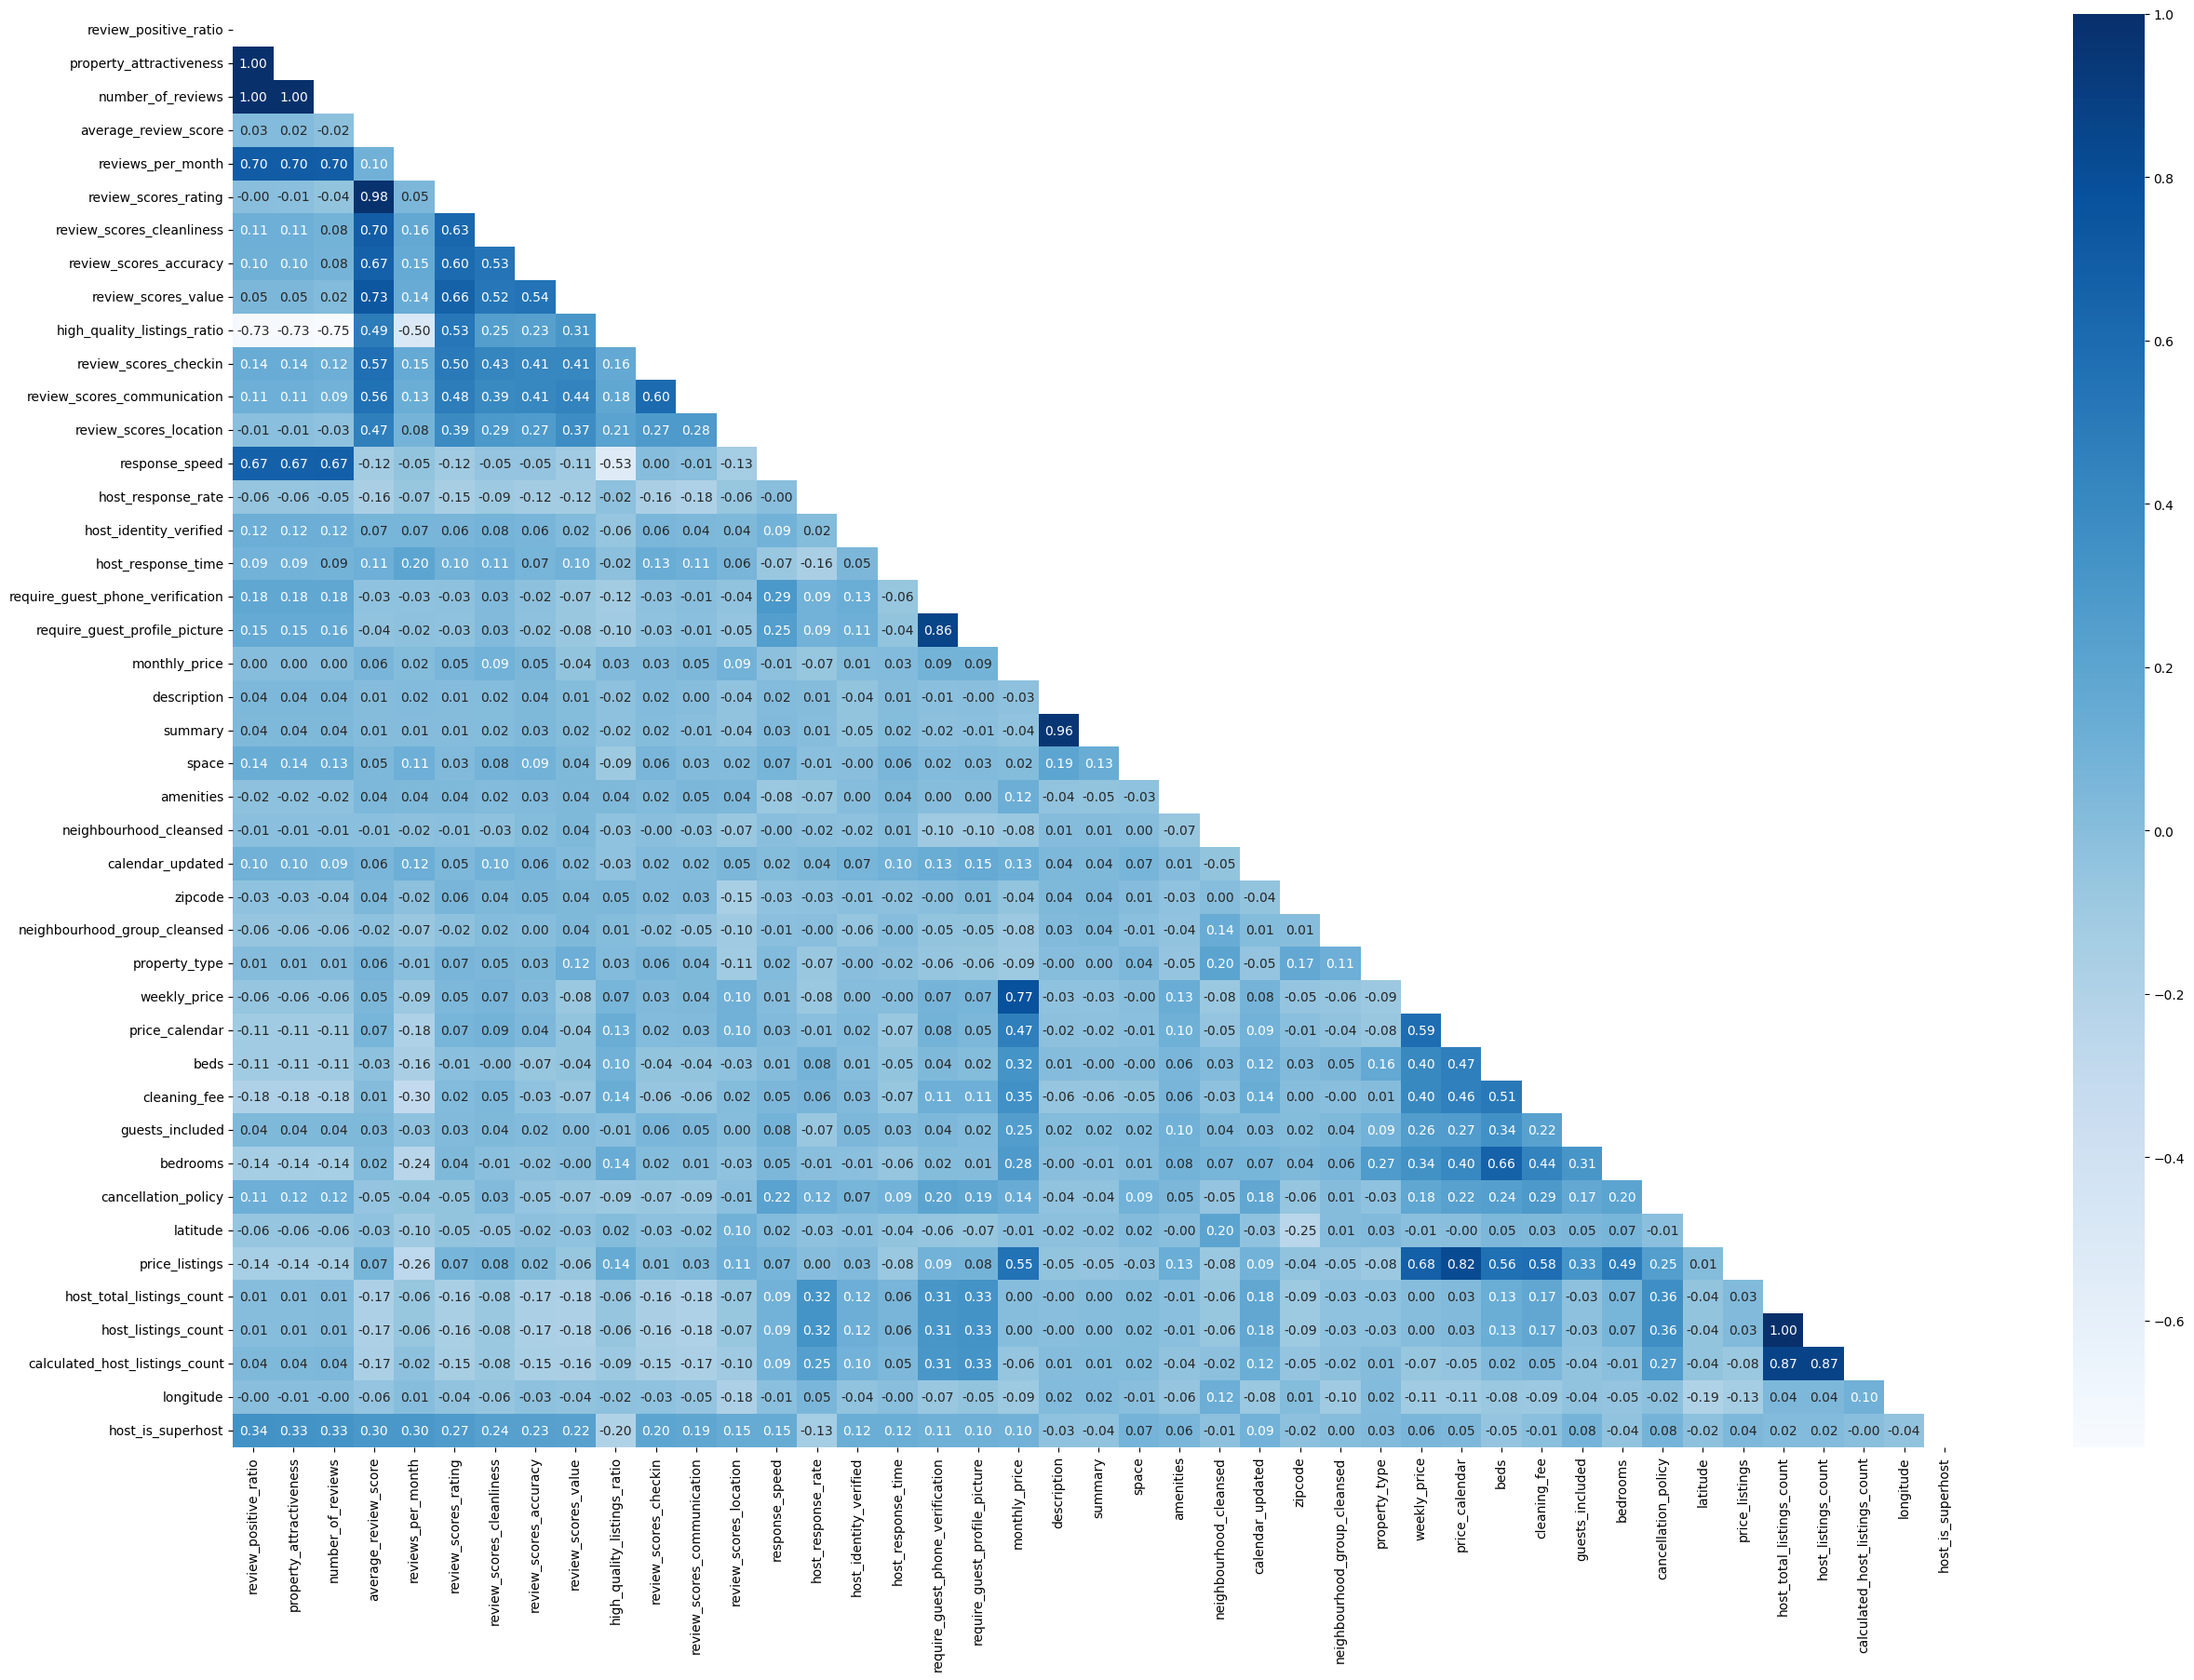

In [379]:
plt.figure(figsize=(30,20))
corr = df_train[feature_importance+["host_is_superhost"]].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Manampilkan Korelasi Feature > Threshold 0.70**

Akan ada info mengenai Feature apa saja yang perlu di drop

In [380]:
def corrtarget(x):
    target = "host_is_superhost"
    return df_train[x].corr(df_train[target])

def corrresp(x):
    target = "host_is_superhost"
    col1 = x["A"]
    col2 = x["B"]

    cor1 = df_train[col1].corr(df_train[target])
    cor2 = df_train[col2].corr(df_train[target])

    if cor1 < cor2:
        return col1
    else:
        return col2
    return col1

In [381]:
corr_matrix = df_train[feature_importance].corr()
target = "host_is_superhost"

# Flatten correlation matrix.
flat_cm = corr_matrix.stack().reset_index()
flat_cm.columns = ['A', 'B', 'correlation']
flat_cm = flat_cm.loc[flat_cm.correlation < 1, :]
flat_cm = flat_cm.sort_values("correlation", ascending=False)
redundan = flat_cm[flat_cm["correlation"] >= 0.7].reset_index(drop=True)
redundan['A vs Target'] = redundan['A'].apply(lambda x: corrtarget(x))
redundan['B vs Target'] = redundan['B'].apply(lambda x: corrtarget(x))
redundan = redundan.drop_duplicates(subset=["correlation"])
redundan["drop"] = redundan.apply(corrresp, axis=1)
redundan

A                              B  \
0              review_positive_ratio        property_attractiveness   
2              review_positive_ratio              number_of_reviews   
4            property_attractiveness              number_of_reviews   
6               review_scores_rating           average_review_score   
8                            summary                    description   
10    calculated_host_listings_count      host_total_listings_count   
14  require_guest_phone_verification  require_guest_profile_picture   
16                    price_listings                 price_calendar   
18                      weekly_price                  monthly_price   
20               review_scores_value           average_review_score   
22           property_attractiveness              reviews_per_month   
24             review_positive_ratio              reviews_per_month   

    correlation  A vs Target  B vs Target                            drop  
0      0.999481     0.338443     0.334418         property_attractiveness  
2      0.999074     0.338443     0.326830               number_of_reviews  
4      0.998854     0.334418     0.326830               number_of_reviews  
6      0.979521     0.270027     0.299691            review_scores_rating  
8      0.958690    -0.038132    -0.032110                         summary  
10     0.872553    -0.003837     0.020233  calculated_host_listings_count  
14     0.863399     0.106922     0.102911   require_guest_profile_picture  
16     0.817626     0.042086     0.045884                  price_listings  
18     0.774596     0.056970     0.100351                    weekly_price  
20     0.733257     0.222875     0.299691             review_scores_value  
22     0.700431     0.334418     0.296098               reviews_per_month  
24     0.700354     0.338443     0.296098               reviews_per_month

#### **2. VIF (Variance Inflation Factor)**

* Tujuan VIF:
VIF digunakan untuk mendeteksi multikolinearitas dengan menunjukkan sejauh mana varians dari koefisien regresi meningkat akibat adanya korelasi antar prediktor.

* Interpretasi Nilai VIF:

- VIF = 1: Tidak ada korelasi antara fitur dengan prediktor lainnya (kondisi ideal).

- VIF 1 hingga 5: Menunjukkan korelasi yang moderat, masih dapat diterima.

- VIF > 5 atau 10: Menunjukkan tingkat multikolinearitas yang tinggi, memerlukan evaluasi lebih lanjut atau penghapusan fitur.

* Dampak VIF Tinggi:
Nilai VIF yang tinggi mengurangi signifikansi statistik dari variabel independen, sehingga sulit untuk menentukan kontribusi individu dari suatu fitur terhadap model. Oleh karena itu, fitur dengan VIF tinggi perlu dipertimbangkan untuk dihapus guna meningkatkan stabilitas model.

In [382]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(df_train[feature_importance])

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df['vif_score'] = round(vif_df['vif_score'], 4)
vif_df.sort_values("vif_score", ascending=False, inplace=True)
vif_df

feature   vif_score
40               host_listings_count         inf
39         host_total_listings_count         inf
3                  number_of_reviews  13031.5099
1              review_positive_ratio  11986.4606
2            property_attractiveness   1221.9934
4               average_review_score    257.2772
6               review_scores_rating    226.3527
5                  reviews_per_month     38.9143
14                    response_speed     36.3014
21                       description     13.2397
22                           summary     12.9990
10       high_quality_listings_ratio      6.3263
38                    price_listings      4.9111
41    calculated_host_listings_count      4.7344
9                review_scores_value      4.5308
18  require_guest_phone_verification      4.1512
19     require_guest_profile_picture      4.1027
7          review_scores_cleanliness      3.7915
30                      weekly_price      3.3219
8             review_scores_accuracy      3.2978
31                    price_calendar      3.1417
13            review_scores_location      2.9744
20                     monthly_price      2.6591
11             review_scores_checkin      2.5905
12       review_scores_communication      2.4609
32                              beds      2.3327
35                          bedrooms      2.1095
33                      cleaning_fee      1.8271
36               cancellation_policy      1.3851
29                     property_type      1.2858
34                   guests_included      1.2468
37                          latitude      1.2333
15                host_response_rate      1.2333
42                         longitude      1.1748
27                           zipcode      1.1723
25            neighbourhood_cleansed      1.1710
17                host_response_time      1.1621
26                  calendar_updated      1.1356
23                             space      1.1294
28      neighbourhood_group_cleansed      1.1006
16            host_identity_verified      1.0624
24                         amenities      1.0593

### **Drop Redundant Features**

In [383]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# Assuming vif_df is already calculated as shown in your provided code

features_to_drop = vif_df[vif_df['vif_score'] > 5]['feature'].tolist()

# Only drop features from feature_importance list
features_to_drop = [feature for feature in features_to_drop if feature in feature_importance]

# Remove redundant features
feature_importance = [feature for feature in feature_importance if feature not in features_to_drop]

print(f"Features dropped due to high VIF: {features_to_drop}")
print(f"Updated feature_importance list: {feature_importance}")

Features dropped due to high VIF: ['host_listings_count', 'host_total_listings_count', 'number_of_reviews', 'review_positive_ratio', 'property_attractiveness', 'average_review_score', 'review_scores_rating', 'reviews_per_month', 'response_speed', 'description', 'summary', 'high_quality_listings_ratio']
Updated feature_importance list: ['review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_value', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'host_response_rate', 'host_identity_verified', 'host_response_time', 'require_guest_phone_verification', 'require_guest_profile_picture', 'monthly_price', 'space', 'amenities', 'neighbourhood_cleansed', 'calendar_updated', 'zipcode', 'neighbourhood_group_cleansed', 'property_type', 'weekly_price', 'price_calendar', 'beds', 'cleaning_fee', 'guests_included', 'bedrooms', 'cancellation_policy', 'latitude', 'price_listings', 'calculated_host_listings_count', 'longitude']


### **Kesimpulan**

Berdasarkan hasil analisis dan seleksi fitur yang telah dilakukan melalui berbagai teknik feature selection, termasuk:

* Penghapusan Fitur yang Tidak Relevan (Drop Unnecessary Features)

* Seleksi Univariat, meliputi:
 * ANOVA F-value
 * Variance Threshold
 * Mutual Information
 * SelectKBest

* Feature Importance Analysis
* Korelasi Pearson (Pearson Correlation)
* Pemeriksaan Multikolinearitas (Multicollinearity Check) dan Penghapusan Redundansi (Drop Redundancy)

Fitur-fitur yang terpilih untuk digunakan dalam proses pemodelan telah ditentukan sebagai berikut:

In [385]:
df_train[feature_importance].head()

review_scores_cleanliness  review_scores_accuracy  review_scores_value  \
0                        0.0                     0.0                  0.0   
1                        0.0                     0.0                  0.0   
2                        0.0                     0.0                  0.0   
3                        0.0                    -1.0                  0.0   
4                       -1.0                    -2.0                 -1.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                    0.0                          0.0                     0.0   
1                    0.0                          0.0                    -1.0   
2                    0.0                          0.0                     0.0   
3                    0.0                         -1.0                     0.0   
4                    0.0                          0.0                     0.0   

   host_response_rate  host_identity_verified  host_response_time  \
0                   0                       1                   3   
1                   0                       1                   2   
2                   0                       1                   3   
3                  42                       1                   3   
4                   0                       1                   3   

   require_guest_phone_verification  require_guest_profile_picture  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   

   monthly_price  space  amenities  neighbourhood_cleansed  calendar_updated  \
0       0.553429   1932       2106                      79                22   
1       0.000000    467        983                       2                27   
2       0.000000    870       1830                      47                 8   
3       0.000000   2355       1805                      12                27   
4       0.308671   2046       1237                      42                27   

   zipcode  neighbourhood_group_cleansed  property_type  weekly_price  \
0        2                            11              9      3.874830   
1       23                            16              9      0.477164   
2       16                             4              9      2.683576   
3        0                             6              0      0.000000   
4        9                             4             13      3.194968   

   price_calendar  beds  cleaning_fee  guests_included  bedrooms  \
0             0.0   0.0      0.606932         1.969923  1.000000   
1             0.0   0.0      0.478638         0.000000 -1.616988   
2             0.0   4.0      0.000000         0.000000  1.734900   
3             0.0   2.0      1.047412         0.000000  1.000000   
4             0.0   1.0      1.364877         1.969923  1.000000   

   cancellation_policy  latitude  price_listings  \
0                    1  0.602281        0.769757   
1                    1 -1.920002        0.000000   
2                    2 -0.274683        0.940017   
3                    2 -0.319472        0.539846   
4                    2 -0.023819        0.521410   

   calculated_host_listings_count  longitude  
0                        0.000000  -0.101822  
1                        0.000000  -1.159205  
2                        0.000000   0.425138  
3                        0.000000  -0.241194  
4                        1.352124   0.730925

## **📌 Handling Imbalanced Data**

In [387]:
X_train = df_train.drop(['host_is_superhost'], axis=1)[feature_importance].reset_index(drop=True) #features
y_train = df_train['host_is_superhost'].reset_index(drop=True) #target
print(X_train.shape, y_train.shape)

(2233, 30) (2233,)


In [388]:
X_test = df_test.drop(['host_is_superhost'], axis=1)[feature_importance].reset_index(drop=True) #features
y_test = df_test['host_is_superhost'].reset_index(drop=True) #target
print(X_test.shape, y_test.shape)

(958, 30) (958,)


In [389]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

In [390]:
X.shape

(3191, 30)

In [391]:
y.shape

(3191,)

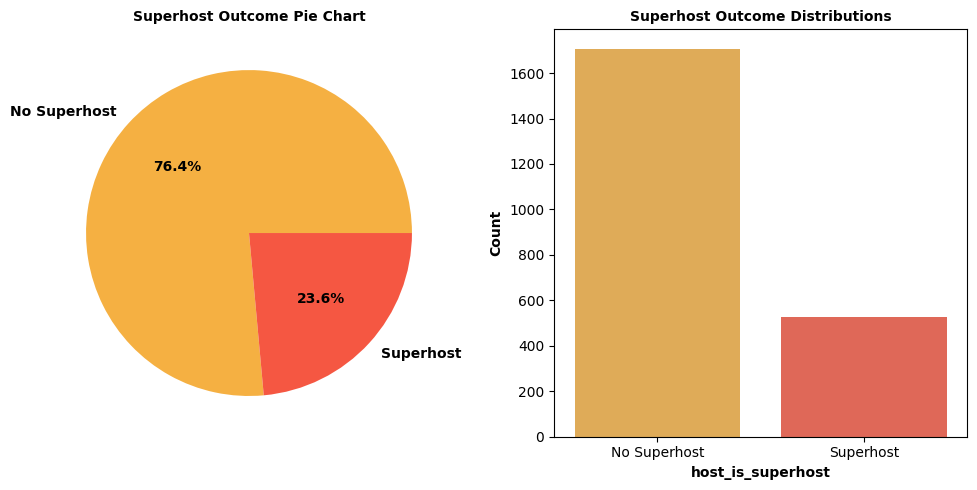

In [397]:
fig = plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.pie(y_train.value_counts(),
        labels = ['No Superhost', 'Superhost'],
        autopct = '%.1f%%',
        radius = 1,
        colors=["#f5b042", "#f55742"],
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Superhost Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)
resp = y_train.apply(lambda x: "No Superhost" if x == 0 else "Superhost")
t = sns.countplot(x=resp, palette=["#f5b042", "#f55742"])
t.set_xlabel('host_is_superhost', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Superhost Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

In [398]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # Response
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # No Response

# Undersampling
# us = RandomUnderSampler(sampling_strategy = 0.5)
# X_balanced_res, y_balanced_res = us.fit_resample(X_train,y_train)

# Oversampling
# os = RandomOverSampler(sampling_strategy = 0.5)
# X_balanced_res, y_balanced_res = os.fit_resample(X_train,y_train)

# Oversampling SMOTE
sm = SMOTE(sampling_strategy=0.5, random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_balanced_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_balanced_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

X_train = X_balanced_res
y_train = y_balanced_res

Before OverSampling, the shape of X_train: (2233, 30)
Before OverSampling, the shape of y_train: (2233,) 

Before OverSampling, counts of label '1': 526
Before OverSampling, counts of label '0': 1707 

After OverSampling, the shape of X_train: (2560, 30)
After OverSampling, the shape of y_train: (2560,) 

After OverSampling, counts of label '1': 853
After OverSampling, counts of label '0': 1707


## **📌 Data Splitting**

# **====== STAGE 3 ======**
`Stage 3 (ML Modelling & Evaluation)`

## **📌 Machine Learning Techniques**

Untuk memprediksi kelas adalah superhost atau tidak kita menggunakan binary classification untuk mendeteksinya berdasarkan beberapa fitur yang sudah kita gunakan

source: https://www.researchgate.net/profile/Vedant-Bahel/publication/347580959_A_Comparative_Study_on_Various_Binary_Classification_Algorithms_and_their_Improved_Variant_for_Optimal_Performance/links/60911b01299bf1ad8d7727a0/A-Comparative-Study-on-Various-Binary-Classification-Algorithms-and-their-Improved-Variant-for-Optimal-Performance.pdf


**Modelling** menggunakan percobaan model:
1. Logistic Regression
2. Naïve Bayes
3. K-Nearest Neighbors (Model Terbaik)
4. Decision Tree
5. Random Forest

Apabila **overfitting** menggunakan metode:
1. cross-validation (2f, 4f, 5f and 10f)
- Note: Pada model Decision Tree pada Random Forest mengalami Overfitting

**Hyperparameter tuning** yang digunakan:
1. Grid Search (Kecuali model Naive Bayes dan Decision Tree)
2. Ensemble Models [Belum]

**Model evaluasi** yang digunakan metrik:
1. Accuracy
2. Precision
3. Recall
4. F1-score



# **DI PILIH MACHINE LEARNING APA SAJA YANG MAU DI TEST**

barangkali mau di tambahkan beberapa machine learning ini

1. Decision Tree
2. Random Forest
3. Logistic Regression
4. Gaussian Naive Bayes
5. K-Nearest Neighbor
6. MLP Classifier (Neural Network)
7. Adaboost Classifier
8. XGBoost Classifier
9. LGBM Classifier
10. Gradient Boosting Classifier
11. Support Vector Machine

**Target Explanation**

> * `True Positive (TP)`, ketika seorang host yang sebenarnya adalah superhost diprediksi sebagai superhost.
> * `False Positive (FP)`, ketika seorang host yang sebenarnya bukan superhost tetapi diprediksi sebagai superhost.
> * `True Negative (TN)`, ketika seorang host yang sebenarnya bukan superhost diprediksi sebagai bukan superhost.
> * `False Negative (FN), ketika seorang host yang sebenarnya adalah superhost tetapi diprediksi sebagai bukan superhost.

> * `Positive / 1` = Host yang teridentifikasi sebagai superhost.
> * `Negative / 0`= Host yang teridentifikasi sebagai bukan superhost.

> * `False Negative` = Host yang teridentifikasi sebagai bukan superhost tetapi sebenarnya adalah superhost.
> * `False Positive` = Host yang teridentifikasi sebagai superhost tetapi sebenarnya bukan superhost.

**Parameter Evaluasi Model**

- `Precision` sebagai Parameter Evaluasi Utama

- Meningkatkan akurasi dalam mengidentifikasi superhost.  
- Mereduksi False Positif (Host yang diprediksi sebagai superhost, namun kenyataannya bukan).

- `Recall` sebagai Parameter Evaluasi Sekunder

- Mengoptimalkan jumlah superhost yang teridentifikasi.  
- Mereduksi False Negative (Host yang diprediksi bukan superhost, namun sebenarnya adalah superhost).

- `F1 Score` untuk memeriksa keseimbangan antara positif dan negatif (Data Tidak Seimbang). Sangat penting untuk masalah ini, kita membutuhkan trade-off antara Precision dan Recall, oleh karena itu, kami menggunakan skor F1 sebagai metrik. Skor F1 didefinisikan sebagai rata-rata harmonik dari Precision dan Recall.

**Interpretation**

- `Precision` – Berapa persen dari prediksi yang benar? :

Dari test data yang diprediksi positif (superhost), berarti x% yang sebenarnya adalah positif (superhost)

Dari data yang diprediksi sebagai superhost, berarti x% yang sebenarnya adalah superhost.

- `Recall` – Berapa persen dari kasus positif yang berhasil kita tangkap? :

Dari semua yang sebenarnya adalah positif (superhost), yang berhasil diprediksi sebagai superhost adalah x%.

**`Target Metrics` =  `Precision` / `Recall` & `F1 Score`**

- `Precision` adalah rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif. Pilih algoritma yang memiliki `Precision` tinggi, jika skenario yang dipilih adalah `False Negative lebih baik terjadi daripada False Positif`.

$$  
\text{Precision} = \frac{TP}{TP + FP}  
$$

- `Recall` adalah rasio kasus dengan prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Pilih algoritma yang memiliki `Recall` tinggi, jika skenario yang dipilih adalah `False Positive lebih baik terjadi daripada False Negative`.

$$  
\text{Recall} = \frac{TP}{TP + FN}  
$$

- `F1-Score` atau dikenal juga dengan nama F-Measure didapatkan dari perbandingan rata-rata presisi dengan recall yang dibobotkan.

$$  
\text{F1 Score} = \frac{2 \times (Recall \times Precision)}{Recall + Precision}  
$$

**Description Classification Report :**

Ini adalah metode Python di bawah API metrik sklearn, berguna ketika kita membutuhkan metrik per kelas di samping metrik global. Ini memberikan precision, recall, dan F1 score pada tingkat individu dan global.

* `precision`akan menjadi "berapa banyak yang diklasifikasikan dengan benar di antara kelas tersebut" (Persentase prediksi positif yang benar relatif terhadap total prediksi positif).

* `recall` berarti "berapa banyak dari kelas ini yang Anda temukan di seluruh jumlah elemen kelas ini". (Persentase prediksi positif yang benar relatif terhadap total aktual positif).

* `f1-score` adalah rata-rata harmonik antara precision & recall. Semakin dekat ke 1, semakin baik model.

* `support` adalah jumlah kemunculan kelas tertentu dalam dataset. Nilai-nilai ini memberi tahu kita berapa banyak host yang termasuk dalam setiap kelas dalam dataset uji. (untuk memeriksa dataset yang seimbang/Proporsi).

* `Accuracy` adalah jumlah dari true positives dan true negatives dibandingkan dengan total jumlah sampel.

* `Macro Average` adalah rata-rata dari precision/recall/F1-score dari semua kelas.

* `Weighted Average` menghitung skor untuk setiap kelas secara independen, tetapi ketika dijumlahkan, mempertimbangkan jumlah klasifikasi yang benar dari setiap kelas.

---

**Referensi Teori**

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- https://muthu.co/understanding-the-classification-report-in-sklearn/#:~:text=A%20Classification%20report%20is%20used,classification%20report%20as%20shown%20below.
- https://machinelearningmastery.com/fbeta-measure-for-machine-learning/
- https://rey1024.medium.com/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8
- https://www.statology.org/sklearn-classification-report/

### **1. Logistic Regression**

#### **Performance of Training Model**

#### **Performance of Testing Model**

### **Summary**

## **📌 Hyperparameter Tuning**

### **1. Logistic Regression**

## **📌 Model Additional**

## **📌 Model Comparison**

## **📌 Model Selection**

#### **Performance of Testing Model**

### **Feature Importance**

#### **Shap Observation**

## **📌 Business Insight and Recommendation**

**📌Conclusion**

## **📌 Simulation**

# **====== STAGE 4 ======**
`Stage 4 (Final Presentation)`